¡Hola!

Mi nombre es Tonatiuh Cruz. Me complace revisar tu proyecto hoy.

Al identificar cualquier error inicialmente, simplemente los destacaré. Te animo a localizar y abordar los problemas de forma independiente como parte de tu preparación para un rol como data-scientist. En un entorno profesional, tu líder de equipo seguiría un enfoque similar. Si encuentras la tarea desafiante, proporcionaré una pista más específica en la próxima iteración.

Encontrarás mis comentarios a continuación - **por favor no los muevas, modifiques o elimines**.

Puedes encontrar mis comentarios en cajas verdes, amarillas o rojas como esta:

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Éxito. Todo está hecho correctamente.
</div>

<div class="alert alert-block alert-warning">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Observaciones. Algunas recomendaciones.
</div>

<div class="alert alert-block alert-danger">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Necesita corrección. El bloque requiere algunas correcciones. El trabajo no puede ser aceptado con comentarios en rojo.
</div>

Puedes responderme utilizando esto:

<div class="alert alert-block alert-info">
<b>Respuesta del estudiante.</b> <a class="tocSkip"></a>
</div>

# Tabla de contenidos

* [Preparación de datos](#preparacion_datos)
    *  [Importación de librerías](#librerias)
    * [Carga y descripción de datos](#carga)
        * [Descripción de datos](#descripcion)
        * [Descripción de Rating (ESRB)](#esrb)
        * [Información general y muestra de datos](#muestra)
    * [Corrigiendo formatos](#formatos)
    * [Duplicados explícitos y duplicados implícitos](#duplicados)
    * [Limpieza de datos](#limpieza)
    * [Valores ausentes](#nan)
    * [Enriquecimiento de datos](#enriquecer)      

* [Analisis de datos](#analisis)
    * [Análisis por plataformas](#platforms)
        * [Ventas de videojuegos por plataformas](#salesconsoles)
        * [Distribuciones de ventas en plataformas](#distributions)
        * [Ciclo de vida de las consolas](#lifecycle)
    * [Relación entre las ventas totales y las reseñas de críticos y usuarios](#scores)
    * [Comparación de ventas de los mismos juegos en diferentes plataformas](#games)
    * [Distribución de los juegos por género](#genre)
    * [Perfil de usuario por región](#region)
    
* [Pruebas de hipótesis](#hipotesis)
    * [Las reseñas promedio de los usuarios para las plataformas Xbox One y PC son las mismas](#test1)
    * [Las reseñas promedio de los usuarios para los géneros de Acción y Deportes son diferentes](#test2)

* [Conclusión](#conclusion)

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

¡Hola! Excelente trabajo con el desarrollo de la tabla de contenidos. Esto es crucial para cualquier proyecto, ya que establece una guía clara sobre los pasos a seguir. Tener estos elementos bien definidos desde el principio nos permite trabajar de manera más organizada y eficiente.
</div>

## Preparación de datos <a class="anchor" id="preparacion_datos"></a>

La primera etapa de este proyecto va a constar de la corrección de datos, lidiar y analizar los valores ausentes, buscar duplicados explícitos e implícitos, correccion de tipos de datos, eliminar información que no es estadísticamente relevante y finalmente el enriquecimiento de la información con la que se cuenta.

### Importación de librerías <a class="anchor" id="librerias"></a>

In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from scipy import stats as st
import seaborn as sns

### Carga y descripción de datos <a class="anchor" id="carga"></a>

In [3]:
videogames_df = pd.read_csv("../datasets/games.csv")


<div class="alert alert-block alert-success">
<b>Comentario del revisor:</b> <a class="tocSkip"></a>
    
Has realizado un excelente trabajo al importar los datos y las bibliotecas necesarias.

</div>

##### Descripción de datos <a class="descripcion" id="carga"></a>
* Name (Nombre)
* Platform (Plataforma)
* Year_of_Release (Año de lanzamiento)
* Genre (Género)
* NA_sales (ventas en Norteamérica en millones de dólares estadounidenses)
* EU_sales (ventas en Europa en millones de dólares estadounidenses)
* JP_sales (ventas en Japón en millones de dólares estadounidenses)
* Other_sales (ventas en otros países en millones de dólares estadounidenses)
* Critic_Score (máximo de 100)
* User_Score (máximo de 10)
* Rating (ESRB)

*Es posible que los datos de 2016 estén incompletos.

##### Descripción de Rating (ESRB) <a class="anchor" id="esrb"></a>

| Clasificación |      Nombre     | Edad Mínima |                               Descripción                               |
|:-------------:|:---------------:|:-----------:|:-----------------------------------------------------------------------:|
| E             | Everyone        | Todos       | Para todos. Contenido apropiado para todas las edades.                  |
| E10+          | Everyone 10+    | 10+         | Para mayores de 10. Contenido adecuado para niños mayores.              |
| EC            | Early Childhood | 3+          | Para niños pequeños. Contenido educativo o de entretenimiento.          |
| K-A           | Kids to Adults  | Todos       | (Anteriormente usado) Similar a E, apropiado para todos.                |
| T             | Teen            | 13+         | Para adolescentes. Contenido adecuado para mayores de 13.               |
| M             | Mature          | 17+         | Para mayores de 17. Contenido maduro con violencia intensa o explícita. |
| AO            | Adults Only     | 18+         | Solo para adultos. Contenido extremadamente gráfico.                    |
| RP            | Rating Pending  | N/A         | Clasificación pendiente, aún no revisado por ESRB.                      |

#### Información general y muestra de datos <a class="muestra" id="carga"></a>

In [4]:
videogames_df.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [5]:
print(videogames_df.head())

                       Name Platform  Year_of_Release         Genre  NA_sales  \
0                Wii Sports      Wii           2006.0        Sports     41.36   
1         Super Mario Bros.      NES           1985.0      Platform     29.08   
2            Mario Kart Wii      Wii           2008.0        Racing     15.68   
3         Wii Sports Resort      Wii           2009.0        Sports     15.61   
4  Pokemon Red/Pokemon Blue       GB           1996.0  Role-Playing     11.27   

   EU_sales  JP_sales  Other_sales  Critic_Score User_Score Rating  
0     28.96      3.77         8.45          76.0          8      E  
1      3.58      6.81         0.77           NaN        NaN    NaN  
2     12.76      3.79         3.29          82.0        8.3      E  
3     10.93      3.28         2.95          80.0          8      E  
4      8.89     10.22         1.00           NaN        NaN    NaN  


### Corrigiendo formatos <a class="anchor" id="formatos"></a>

In [6]:
# Cambia a minúsculas los nombres de columnas
new_columns_names = []  # nueva lista vacía

# Bucle que itera sobre las columnas del DF
for old_columns in videogames_df:
    new_columns = old_columns.lower()  # Cambia los nombres a minúsculas
    col_stripped = new_columns.strip()  # Quita los espacios
    # Agrega a la lista de new_column_names
    new_columns_names.append(col_stripped)

videogames_df.columns = new_columns_names  # Reemplaza los nombres

print(videogames_df.head())

                       name platform  year_of_release         genre  na_sales  \
0                Wii Sports      Wii           2006.0        Sports     41.36   
1         Super Mario Bros.      NES           1985.0      Platform     29.08   
2            Mario Kart Wii      Wii           2008.0        Racing     15.68   
3         Wii Sports Resort      Wii           2009.0        Sports     15.61   
4  Pokemon Red/Pokemon Blue       GB           1996.0  Role-Playing     11.27   

   eu_sales  jp_sales  other_sales  critic_score user_score rating  
0     28.96      3.77         8.45          76.0          8      E  
1      3.58      6.81         0.77           NaN        NaN    NaN  
2     12.76      3.79         3.29          82.0        8.3      E  
3     10.93      3.28         2.95          80.0          8      E  
4      8.89     10.22         1.00           NaN        NaN    NaN  


En este punto se iteró sobre cada columna, cambiando los nombres a minúsculas y eliminando los espacios al inicio y al final de cada nombre. Los nuevos nombres se guardaron en la lista `new_column_names` y luego se reemplazaron los nombres existentes con los que están dentro de esta lista.

### Duplicados explícitos y duplicados implícitos <a class="anchor" id="duplicados"></a>

In [7]:
# Imprime el total de filas duplicadas
print(videogames_df.duplicated().sum())

0


<div class="alert alert-block alert-success">
    <b>Comentario del revisor:</b> <a class="tocSkip"></a>
    
Como aprendiste en cursos anteriores, el análisis de registros duplicados es esencial en el análisis de datos para evitar que sesguen nuestros resultados.
</div>

In [8]:
# Selecciona las columnas a revisar y mostrar los valores únicos para cada una
columns_to_check = ["platform", "genre", "rating", "critic_score", "user_score"]

# Bucle que itera sobre las en la lista y extrae los valores únicos
for column in columns_to_check:
    unique_values = sorted(
        videogames_df[column].unique().astype("str")
    )  # convierte los valores en string y los ordena
    print(f"{column} valores únicos:\n{unique_values}\n")

platform valores únicos:
['2600', '3DO', '3DS', 'DC', 'DS', 'GB', 'GBA', 'GC', 'GEN', 'GG', 'N64', 'NES', 'NG', 'PC', 'PCFX', 'PS', 'PS2', 'PS3', 'PS4', 'PSP', 'PSV', 'SAT', 'SCD', 'SNES', 'TG16', 'WS', 'Wii', 'WiiU', 'X360', 'XB', 'XOne']

genre valores únicos:
['Action', 'Adventure', 'Fighting', 'Misc', 'Platform', 'Puzzle', 'Racing', 'Role-Playing', 'Shooter', 'Simulation', 'Sports', 'Strategy', 'nan']

rating valores únicos:
['AO', 'E', 'E10+', 'EC', 'K-A', 'M', 'RP', 'T', 'nan']

critic_score valores únicos:
['13.0', '17.0', '19.0', '20.0', '21.0', '22.0', '23.0', '24.0', '25.0', '26.0', '27.0', '28.0', '29.0', '30.0', '31.0', '32.0', '33.0', '34.0', '35.0', '36.0', '37.0', '38.0', '39.0', '40.0', '41.0', '42.0', '43.0', '44.0', '45.0', '46.0', '47.0', '48.0', '49.0', '50.0', '51.0', '52.0', '53.0', '54.0', '55.0', '56.0', '57.0', '58.0', '59.0', '60.0', '61.0', '62.0', '63.0', '64.0', '65.0', '66.0', '67.0', '68.0', '69.0', '70.0', '71.0', '72.0', '73.0', '74.0', '75.0', '76.0', 

Inicialmente, se confirmó que no había duplicados explícitos buscando filas completamente duplicadas. Posteriormente, se verificó que no existían duplicados implícitos al buscar valores únicos en las columnas `platform`, `genre`, `rating`, `critic_score` y `user_score`, ya que son columnas categóricas donde se podrían esperar este tipo de errores.

### Limpieza de datos <a class="anchor" id="limpieza"></a>

In [9]:
# Imprime la suma de valores ausentes en cada columna
print(videogames_df.isna().sum())

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64


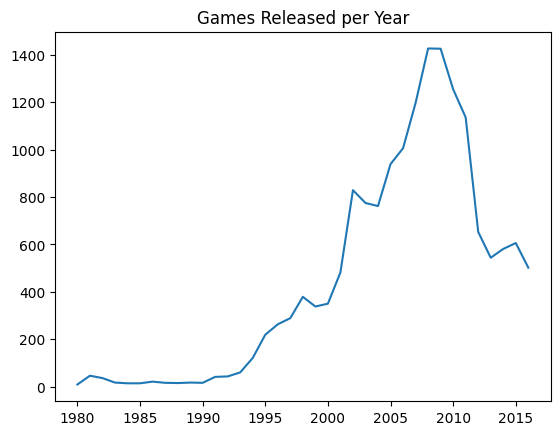

In [10]:
# Cuenta los juegos lanzados por año y los grafica
videogames_df.groupby("year_of_release")["name"].count().plot(
    kind="line", title="Games Released per Year", xlabel=""
)
plt.show()

In [11]:
# Cuenta los juegos lanzados cada año
print(videogames_df["year_of_release"].value_counts(dropna=False).sort_index())

year_of_release
1980.0       9
1981.0      46
1982.0      36
1983.0      17
1984.0      14
1985.0      14
1986.0      21
1987.0      16
1988.0      15
1989.0      17
1990.0      16
1991.0      41
1992.0      43
1993.0      62
1994.0     121
1995.0     219
1996.0     263
1997.0     289
1998.0     379
1999.0     338
2000.0     350
2001.0     482
2002.0     829
2003.0     775
2004.0     762
2005.0     939
2006.0    1006
2007.0    1197
2008.0    1427
2009.0    1426
2010.0    1255
2011.0    1136
2012.0     653
2013.0     544
2014.0     581
2015.0     606
2016.0     502
NaN        269
Name: count, dtype: int64


In [12]:
# Mantiene los datos posteriores a 1994 y reinicia el index
games = videogames_df.query("year_of_release >= 1994").reset_index(drop=True)

print(
    "Total de filas eliminadas",
    videogames_df["year_of_release"].count() - games["year_of_release"].count(),
    "\n",
)

Total de filas eliminadas 367 



Se analizó la columna `year_of_release`, revisando la cantidad de datos por año. Basado en esta información, se filtraron y eliminaron los años anteriores a 1994 debido a su irrelevancia estadística, eliminando un total de 367 filas, lo cual es menos del 5% de la información total y no afecta los resultados estadísticos.

### Valores ausentes <a class="anchor" id="nan"></a>

In [13]:
# Imprime la suma de valores ausentes en cada columna
print(games.isna().sum())

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8099
user_score         6243
rating             6315
dtype: int64


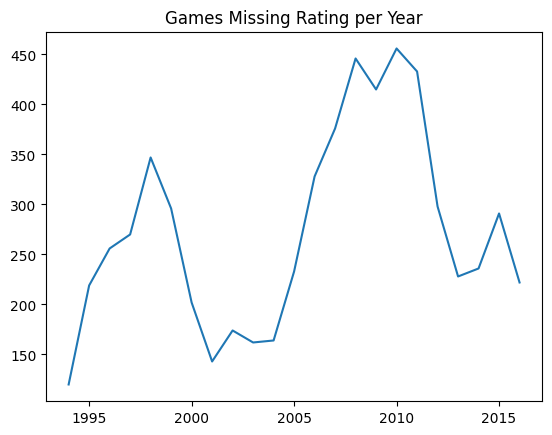

rating
NaN     6315
E       3921
T       2903
M       1535
E10+    1392
EC         8
K-A        3
AO         1
RP         1
Name: count, dtype: int64


In [14]:
# Imprime una gráfica mostrando en cuáles años se tienen valores ausentes en la columna 'rating'
games["rating"].isna().groupby(games["year_of_release"]).sum().plot(
    kind="line", title="Games Missing Rating per Year", xlabel=""
)
plt.show()

print(games["rating"].value_counts(dropna=False))

In [15]:
# Rellena los valores ausentes de la columna rating con RP (rating pending)
games["rating"] = games["rating"].fillna("RP")

print(games["rating"].isna().sum())

0


In [16]:
print("Mediana de reseñas de críticos", games["critic_score"].median(), "\n")

# Cuenta las veces que aparece cada valor e imprime los 5 valores más comunes
print(games["critic_score"].value_counts(dropna=False).head(10))

Mediana de reseñas de críticos 71.0 

critic_score
NaN     8099
70.0     252
71.0     248
75.0     240
80.0     235
73.0     234
78.0     233
76.0     228
72.0     223
74.0     223
Name: count, dtype: int64


In [17]:
# Crea una columna nueva para 'critic_score' que se mantenga en tipo de datos float y rellena los valores ausentes por la mediana de esta columna
games["critic_score_float"] = games["critic_score"].fillna(
    games["critic_score"].median()
)

# Rellena valores ausentes en columna 'critic_score' con 'not_rated'
games["critic_score"] = games["critic_score"].fillna("not_rated")

In [18]:
# Cuenta las veces que aparece cada valor en la nueva columna de 'critic_score_float' e imprime los 5 valores más comunes
print(games["critic_score_float"].value_counts(dropna=False).head(10), "\n")

critic_score_float
71.0    8347
70.0     252
75.0     240
80.0     235
73.0     234
78.0     233
76.0     228
72.0     223
74.0     223
77.0     218
Name: count, dtype: int64 



<div class="alert alert-block alert-danger">
    <b>Comentario del revisor:</b> <a class="tocSkip"></a>
    
Cuando trabajamos con distribuciones sesgadas, como en este caso, se recomienda completar los valores nulos con la mediana
</div>

In [19]:
# Cuenta las veces que aparece cada valor en la nueva columna de 'user_score' e imprime los 5 valores más comunes
print(games["user_score"].value_counts(dropna=False).head(10))

user_score
NaN    6243
tbd    2376
7.8     322
8       285
8.2     275
8.3     252
7.5     249
8.5     247
7.9     246
8.1     237
Name: count, dtype: int64


In [20]:
# Crea una nueva columna para 'user_score' reemplaza el string 'tbd' con valores nan y cambia el tipo de datos a float
games["user_score_float"] = games["user_score"].replace("tbd", np.nan).astype("float")

# Imprime la mediana de user_score_float
print(games["user_score_float"].median())

# Rellena los valores ausentes de user_score por la mediana de esta columna
games["user_score_float"] = games["user_score_float"].fillna(
    games["user_score_float"].median()
)

print(games["user_score"].value_counts(dropna=False).head(10))

# Rellena valores ausentes en columna 'user_score' con 'not_rated'
games["user_score"] = games["user_score"].fillna("not_rated")

7.5
user_score
NaN    6243
tbd    2376
7.8     322
8       285
8.2     275
8.3     252
7.5     249
8.5     247
7.9     246
8.1     237
Name: count, dtype: int64


In [21]:
# Cuenta las veces que aparece cada valor en la nueva columna de 'user_score_float' e imprime los 5 valores más comunes
print(games["user_score_float"].value_counts(dropna=False).head(10))

user_score_float
7.5    8868
7.8     322
8.0     285
8.2     275
8.3     252
8.5     247
7.9     246
8.1     237
7.7     236
7.3     232
Name: count, dtype: int64


<div class="alert alert-block alert-danger">
    <b>Comentario del revisor:</b> <a class="tocSkip"></a>
    
Cuando trabajamos con distribuciones sesgadas, como en este caso, se recomienda completar los valores nulos con la mediana
</div>

<Axes: title={'center': "User Score 'tbd' per Year"}>

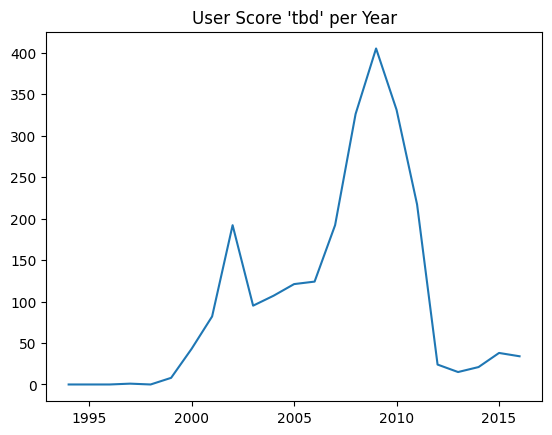

In [22]:
# Crea un gráfico que muestra los juegos en los cuales user_score contiene 'tbd'
(games["user_score"] == "tbd").groupby(games["year_of_release"]).sum().plot(
    kind="line", title="User Score 'tbd' per Year", xlabel=""
)

En la columna `rating`, los valores ausentes (6,315) se rellenaron con 'RP' (Rating Pending). En la columna `user_score`, los valores con el string 'tbd' (2,376) se dejaron así y los valores ausentes (6,243) se rellenaron con 'not_rated'. En la columna `critic_score`, los valores ausentes (8,159) se rellenaron con 'not rated'.

Inicialmente, se podría suponer que los valores 'tbd' en la columna `user_score` se presentan únicamente en años recientes. Sin embargo, al analizar los valores 'tbd' a lo largo de los años, se observa como son tanto videojuegos recientes como no recientes que se quedaron sin calificación. Hay valores'tbd' que se presentan desde el año 2000.

Para evitar errores con el tipo de datos en las columnas `user_score` y `critic_score`, se crearon las nuevas columnas `user_score_float` y `critic_score_float`. En estas columnas, los strings 'not_rated' y 'tbd' se rellenaron con la media de cada columna.

### Enriquecimiento de datos <a class="anchor" id="enriquecer"></a>

In [23]:
# Crea nueva columna de 'total_sales' que suma las ventas de todas las regiones
games["total_sales"] = games[["na_sales", "eu_sales", "jp_sales", "other_sales"]].sum(
    axis=1
)
print(games.sample(5))

                                   name platform  year_of_release     genre  \
15374              Majesty 2 Collection       PC           2011.0  Strategy   
14983                      Trapped Dead       PC           2011.0  Strategy   
11439                       Robocalypse       DS           2008.0  Strategy   
11342  Pong / Asteroids / Yars' Revenge      GBA           2005.0      Misc   
2664           Dragon Ball: Xenoverse 2      PS4           2016.0    Action   

       na_sales  eu_sales  jp_sales  other_sales critic_score user_score  \
15374      0.00      0.01      0.00         0.00    not_rated        8.3   
14983      0.00      0.02      0.00         0.00         50.0        4.7   
11439      0.07      0.00      0.00         0.01         78.0        8.6   
11342      0.05      0.02      0.00         0.00    not_rated        tbd   
2664       0.24      0.27      0.09         0.10         73.0        7.8   

      rating  critic_score_float  user_score_float  total_sales  
15

<div class="alert alert-block alert-success">
<b>Comentario del revisor:</b> <a class="tocSkip"></a>
    
Hola! Muy buen trabajo en la sección, ajustaste los nombres de las columnas a minúsculas con el uso de la función str.lower(), cambiaste el tipo de variable de dos de las variables de la base de datos, consideraste ajustar los valores ausentes de las variables identificadas de score y muy buen trabajo con la suma de todas las ventas.
    
   

</div>

In [24]:
# Crea DF con nombres de Consoles + Compañías productoras + Tipos de dispositivos para referenciar

platform = [
    "Wii",
    "NES",
    "GB",
    "DS",
    "X360",
    "PS3",
    "PS2",
    "SNES",
    "GBA",
    "PS4",
    "3DS",
    "N64",
    "PS",
    "XB",
    "PC",
    "2600",
    "PSP",
    "XOne",
    "WiiU",
    "GC",
    "GEN",
    "DC",
    "PSV",
    "SAT",
    "SCD",
    "WS",
    "NG",
    "TG16",
    "3DO",
    "GG",
    "PCFX",
]

producer = [
    "Nintendo",
    "Nintendo",
    "Nintendo",
    "Nintendo",
    "Microsoft",
    "Sony",
    "Sony",
    "Nintendo",
    "Nintendo",
    "Sony",
    "Nintendo",
    "Nintendo",
    "Sony",
    "Microsoft",
    "Others",
    "Atari",
    "Sony",
    "Microsoft",
    "Nintendo",
    "Nintendo",
    "Sega",
    "Sega",
    "Sony",
    "Sega",
    "Sega",
    "Bandai",
    "SNK",
    "NEC",
    "Panasonic",
    "Sega",
    "NEC",
]


device_type = [
    "Console",
    "Console",
    "Handheld",
    "Handheld",
    "Console",
    "Console",
    "Console",
    "Console",
    "Handheld",
    "Console",
    "Handheld",
    "Console",
    "Console",
    "Console",
    "Console",
    "Console",
    "Handheld",
    "Console",
    "Console",
    "Console",
    "Console",
    "Console",
    "Handheld",
    "Console",
    "Console",
    "Handheld",
    "Handheld",
    "Console",
    "Console",
    "Handheld",
    "Console",
]

# Crea un DataFrame de plataformas con producer y device_type
platform_df = pd.DataFrame(
    {"platform": platform, "producer": producer, "device_type": device_type}
)


# Une el DataFrame de plataformas con el DataFrame de juegos
games = games.merge(platform_df, on="platform", how="left")

print(games.head())

                       name platform  year_of_release         genre  na_sales  \
0                Wii Sports      Wii           2006.0        Sports     41.36   
1            Mario Kart Wii      Wii           2008.0        Racing     15.68   
2         Wii Sports Resort      Wii           2009.0        Sports     15.61   
3  Pokemon Red/Pokemon Blue       GB           1996.0  Role-Playing     11.27   
4     New Super Mario Bros.       DS           2006.0      Platform     11.28   

   eu_sales  jp_sales  other_sales critic_score user_score rating  \
0     28.96      3.77         8.45         76.0          8      E   
1     12.76      3.79         3.29         82.0        8.3      E   
2     10.93      3.28         2.95         80.0          8      E   
3      8.89     10.22         1.00    not_rated  not_rated     RP   
4      9.14      6.50         2.88         89.0        8.5      E   

   critic_score_float  user_score_float  total_sales  producer device_type  
0                76.0

Se creó la nueva columna `total_sales`, que suma las ventas de todas las regiones. Además, se creó un DataFrame `platforms_df` que contiene la relación entre la consola (`platform`), la compañía fabricante (`producer`) y el tipo de dispositivo (`device_type`). Luego, esta información se integró en el DataFrame `games` mediante un merge left.

## Analisis de datos <a class="anchor" id="analisis"></a>

### Análisis por plataformas <a class="anchor" id="platforms"></a>

#### Ventas de videojuegos por plataformas <a class="anchor" id="salesconsoles"></a>

In [25]:
# Agrupa las ventas por ventas recientes

In [26]:
# Obtiene la lista de las 5 plataformas con mayores ventas totales
top_sales_platforms = list(
    games.groupby("platform")[
        "total_sales"
    ]  # Agrupa por plataforma y suma las ventas totales
    .sum()
    .sort_values(ascending=False)  # Ordena las ventas en orden descendente
    .head(5)  # Toma las 5 primeras plataformas
    .index  # Obtiene los nombres de las plataformas
)

# Obtiene la lista de las 5 consolas no portátiles con mayores ventas totales
top_sales_consoles = (
    games[
        games["device_type"] == "Console"
    ]  # Filtra los datos para incluir solo consolas no portátiles
    .groupby("platform")[
        "total_sales"
    ]  # Agrupa por plataforma y suma las ventas totales
    .sum()
    .sort_values(ascending=False)  # Ordena las ventas en orden descendente
    .head(5)  # Toma las 5 primeras consolas
)

# Obtiene la lista de las consolas portátiles con mayores ventas totales
top_sales_handheld = (
    games[
        games["device_type"] == "Handheld"
    ]  # Filtra los datos para incluir solo consolas portátiles
    .groupby("platform")[
        "total_sales"
    ]  # Agrupa por plataforma y suma las ventas totales
    .sum()
    .sort_values(ascending=False)  # Ordena las ventas en orden descendente
)

# Obtiene la lista de los 5 productores con mayores ventas totales
top_producers = (
    games.groupby(["producer"])["total_sales"]
    .sum()
    .sort_values(ascending=False)
    .head(5)
)

# Imprime las listas de ventas top
print("Top 5 consolas más vendidas:\n", top_sales_consoles, "\n")
print("Top consolas portátiles más vendidas:\n", top_sales_handheld, "\n")
print("Top productores con más ventas:\n", top_producers)

# Convierte las agrupaciones a listas de nombres de consolas y productores
top_sales_consoles = list(
    top_sales_consoles.index
)  # Convierte las consolas no portátiles a una lista
top_sales_handheld = list(
    top_sales_handheld.head(5).index
)  # Convierte las consolas portátiles a una lista (top 5)
top_producers = list(
    top_producers.head(5).index
)  # Convierte los productores a una lista (top 5)

Top 5 consolas más vendidas:
 platform
PS2     1233.56
X360     961.24
PS3      931.34
Wii      891.18
PS       727.58
Name: total_sales, dtype: float64 

Top consolas portátiles más vendidas:
 platform
DS     802.76
GBA    312.88
PSP    289.53
3DS    257.81
GB     152.08
PSV     53.81
WS       1.42
NG       1.23
Name: total_sales, dtype: float64 

Top productores con más ventas:
 producer
Sony         3549.96
Nintendo     2998.42
Microsoft    1372.13
Others        252.66
Sega           58.03
Name: total_sales, dtype: float64


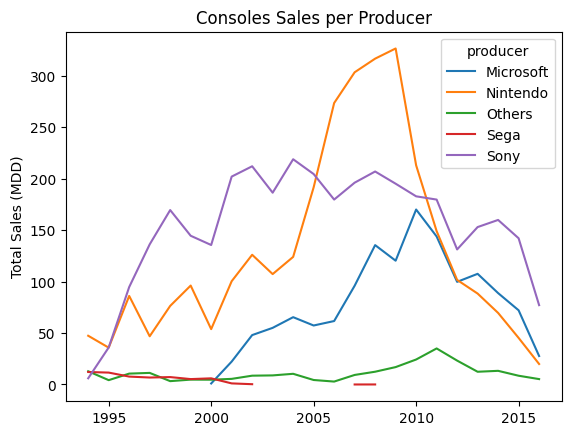

In [27]:
# Grafica las ventas totales por productor a lo largo del tiempo
games[games["producer"].isin(top_producers)].pivot_table(
    index="year_of_release", columns="producer", values="total_sales", aggfunc="sum"
).plot(
    kind="line",
    title="Consoles Sales per Producer",
    xlabel="",
    ylabel="Total Sales (MDD)",
)

# Muestra el gráfico
plt.show()

<div class="alert alert-block alert-warning">
<b>Comentario del revisor</b> <a class="tocSkip"></a>
    
Gran trabajo con el desarrollo de la gráfica. Solamente te recomendaría que intentes reducir el periodo dado que el perido actual puede resultar muy extenso. Recordemos que con base en la información la popularidad la alcanzan en los primeros años. Es por ello que con un periodo largo puede no ser posible analizar de forma clara las plataformas y videojuegos actualizados y podrías estar analizando los desactualizados. Es por ello y dado que buscamos responder qué vender en 2017 te recomendareia gráficar un periodo que no supere los 5 años.     

</div>

<div class="alert alert-block alert-info">
<b> Comentario de estudiante.</b> <br>
En este caso creo que era relevante saber la historia de cómo se habían comportado las ventas de videojuegos históricamente. Al final considero que con el análisis que se realizó por productor se puede ver claramente información relevante para 2017 sin necesidad de reducir la información en esta parte del análisis.<a class="tocSkip"></a>
</div>

In [28]:
# Imprime las plataformas de consolas no portátiles producidas por "Others"
print(
    (
        games[(games["producer"] == "Others") & (games["device_type"] == "Console")][
            "platform"
        ]
    ).unique()
)

['PC']


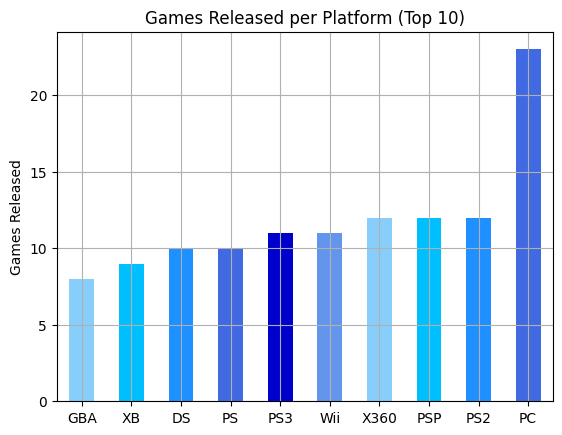

In [29]:
# Lista de colores para el gráfico
colors = [
    "lightskyblue",
    "deepskyblue",
    "dodgerblue",
    "royalblue",
    "mediumblue",
    "cornflowerblue",
]

# Grafica el número de juegos lanzados por plataforma (top 10 plataformas con más lanzamientos)
games.groupby("platform")["year_of_release"].nunique().sort_values().tail(10).plot(
    kind="bar",
    title="Games Released per Platform (Top 10)",
    grid=True,
    rot=0,
    xlabel="",
    ylabel="Games Released",
    color=colors,
)

# Muestra el gráfico
plt.show()

In [30]:
# Muestra las consolas de diferentes productores
# Listas de tipos de consolas

# Consolas de Microsoft
microsoft_consoles = (
    games[(games["producer"] == "Microsoft") & (games["device_type"] == "Console")][
        "platform"
    ]
).unique()
print("Consolas de Microsoft", microsoft_consoles)

# Consolas de Sony
sony_consoles = (
    games[(games["producer"] == "Sony") & (games["device_type"] == "Console")][
        "platform"
    ]
).unique()
# Consolas portátiles de Sony
sony_handhelds = (
    games[(games["producer"] == "Sony") & (games["device_type"] == "Handheld")][
        "platform"
    ]
).unique()
print("Consolas de Sony", sony_consoles)
print("Consolas portables de Sony", sony_handhelds)

# Consolas de Nintendo
nintendo_consoles = (
    games[(games["producer"] == "Nintendo") & (games["device_type"] == "Console")][
        "platform"
    ]
).unique()
# Consolas portátiles de Nintendo
nintendo_handheld = (
    games[(games["producer"] == "Nintendo") & (games["device_type"] == "Handheld")][
        "platform"
    ]
).unique()

print("Consolas de Nintendo", nintendo_consoles)
print("Consolas portables de Nintendo", nintendo_handheld)

Consolas de Microsoft ['X360' 'XB' 'XOne']
Consolas de Sony ['PS3' 'PS2' 'PS4' 'PS']
Consolas portables de Sony ['PSP' 'PSV']
Consolas de Nintendo ['Wii' 'N64' 'SNES' 'WiiU' 'GC' 'NES']
Consolas portables de Nintendo ['GB' 'DS' 'GBA' '3DS']


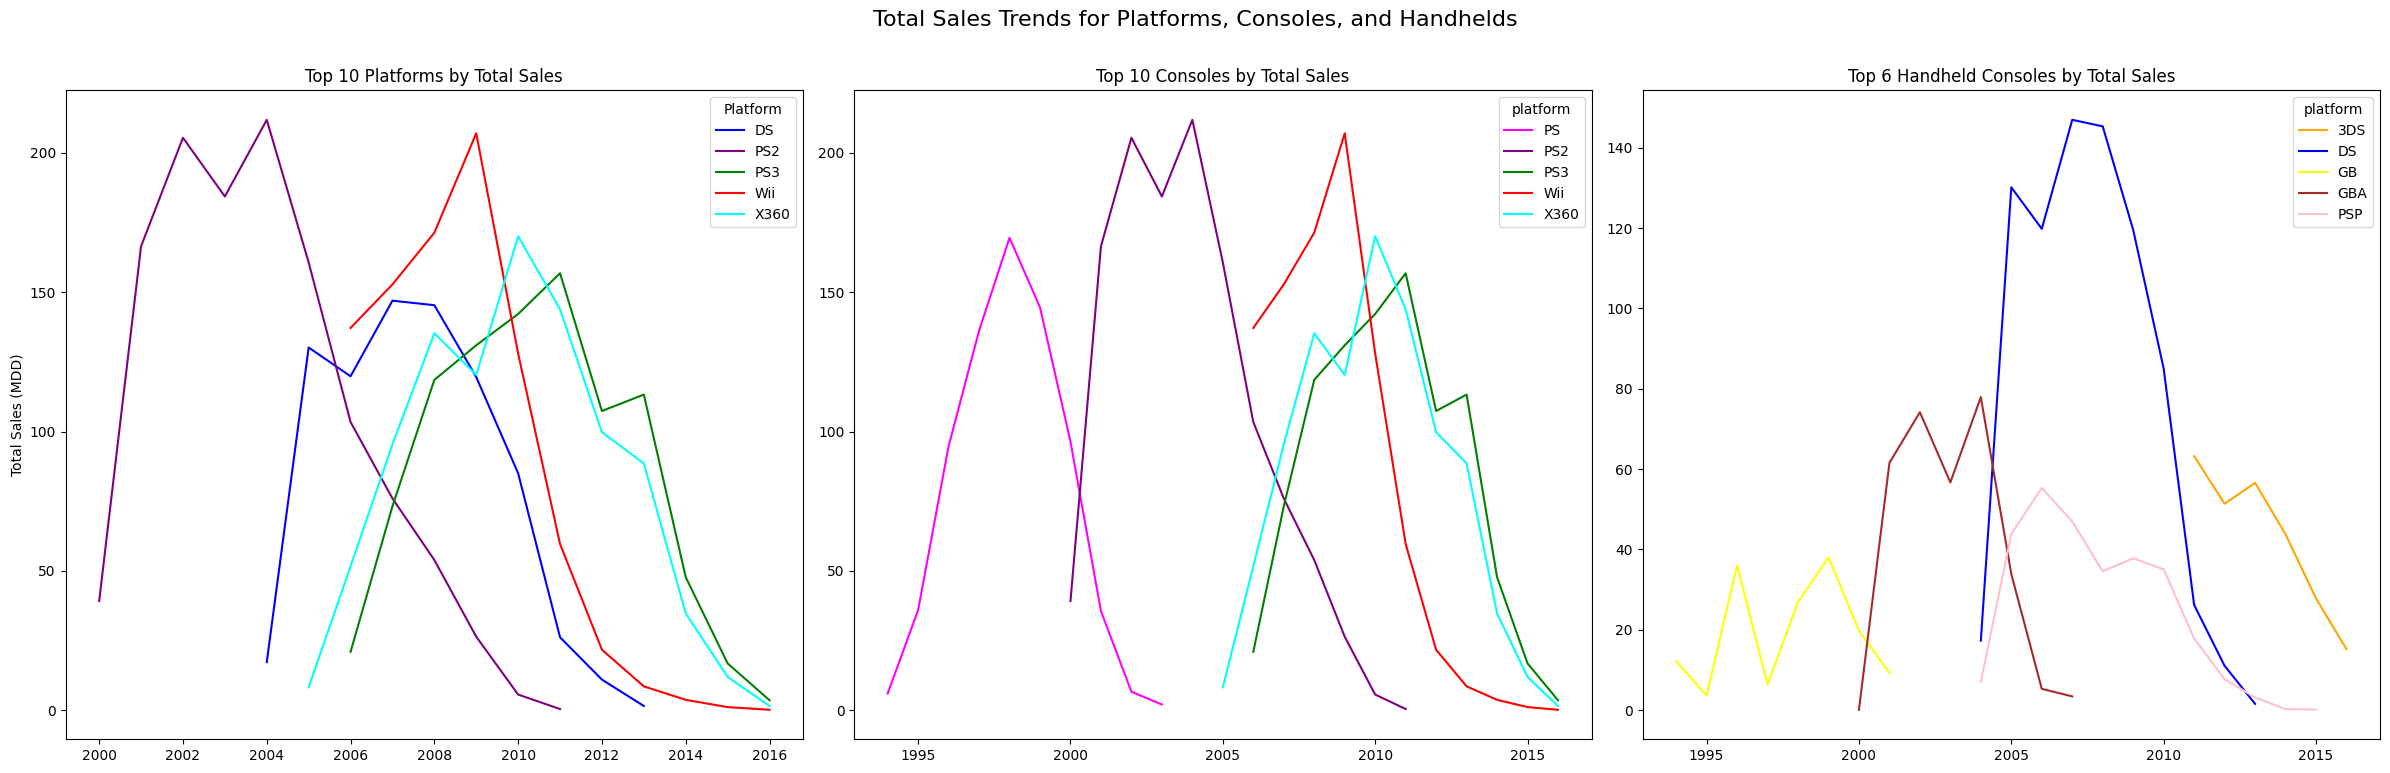

In [31]:
# Crear subplots de 1 fila por 3 columnas
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(24, 8))
fig.subplots_adjust(wspace=0.3)

# Define colores específicos para cada plataforma
colors = {
    "DS": "blue",
    "PS3": "green",
    "Wii": "red",
    "PS2": "purple",
    "3DS": "orange",
    "X360": "cyan",
    "PS": "magenta",
    "GB": "yellow",
    "GBA": "brown",
    "PSP": "pink",
}

# Gráfico para las plataformas más vendidas
pivot_platforms = games[games["platform"].isin(top_sales_platforms)].pivot_table(
    index="year_of_release", columns="platform", values="total_sales", aggfunc="sum"
)
pivot_platforms.plot(
    kind="line", ax=axes[0], color=[colors.get(x, "black") for x in pivot_platforms]
)
axes[0].set_title("Top 10 Platforms by Total Sales")
axes[0].set_xlabel("")
axes[0].set_ylabel("Total Sales (MDD)")
axes[0].legend(title="Platform")

# Gráfico para las consolas más vendidas
pivot_consoles = games[games["platform"].isin(top_sales_consoles)].pivot_table(
    index="year_of_release", columns="platform", values="total_sales", aggfunc="sum"
)
pivot_consoles.plot(
    kind="line", ax=axes[1], color=[colors.get(x, "black") for x in pivot_consoles]
)
axes[1].set_title("Top 10 Consoles by Total Sales")
axes[1].set_xlabel("")
axes[1].set_ylabel("")
axes[0].legend(title="Platform")

# Gráfico para las consolas portátiles más vendidas
pivot_handhelds = games[games["platform"].isin(top_sales_handheld)].pivot_table(
    index="year_of_release", columns="platform", values="total_sales", aggfunc="sum"
)
pivot_handhelds.plot(
    kind="line", ax=axes[2], color=[colors.get(x, "black") for x in pivot_handhelds]
)
axes[2].set_title("Top 6 Handheld Consoles by Total Sales")
axes[2].set_xlabel("")
axes[2].set_ylabel("")
axes[0].legend(title="Platform")

# Título principal
fig.suptitle(
    "Total Sales Trends for Platforms, Consoles, and Handhelds", fontsize=16, y=0.96
)

# Ajusta el layout
fig.tight_layout(rect=[0, 0, 1, 0.95])  # Deja espacio para el título principal
plt.show()

Las consolas que más videojuegos han vendido son de Sony (PlayStation), Microsoft (Xbox) y Nintendo. La plataforma que más ventas ha tenido hasta 2016 es el PlayStation 2 de Sony con $1,234 MDD, seguido por el Xbox 360 de Microsoft con $961 MDD. La tercera consola con más ventas es nuevamente de Sony, el PlayStation 3.

En cuanto a las consolas portátiles, las que más juegos han vendido son de Nintendo, registrando ventas en el DS de $803 MDD, el GBA de $313 MDD y finalmente el PSP de Sony con $290 MDD. En general, las ventas de videojuegos en consolas no portátiles son mayores que las de consolas portátiles.

Al visualizar las ventas por productor a través del tiempo, se aprecia que desde 1995 la compañía que globalmente ha tenido mayores ventas totales es Sony, con $3,550 MDD, manteniéndose casi siempre por encima de sus competidores a través de los años. Nintendo se encuentra en el segundo lugar, con ventas totales de $2,998 MDD. Aunque no siempre ha estado por encima de su competencia, entre 2008 y 2012 tuvo un pico en ventas, llegando a superar a Sony en ese periodo. Sin embargo, parece que en los últimos años no ha recuperado su posición y en 2015 se posicionaba con las ventas más bajas entre los tres.

Microsoft, que entró al mercado en el año 2000, ha registrado ventas globales de $1,372 MDD, casi siempre por debajo de su competencia, a excepción de alrededor del año 2010. Curiosamente, el productor registrado como "Others", que indica las ventas del PC, a pesar de nunca haber estado en el top de ventas, se ha mantenido consistentemente a través de los años y ha registrado ventas de $252 MDD hasta 2016. Se podría decir que el PC es la consola atemporal por defecto y también es la plataforma que tiene la mayor cantidad de juegos disponibles.

#### Distribuciones de ventas en plataformas <a class="anchor" id="distributions"></a>

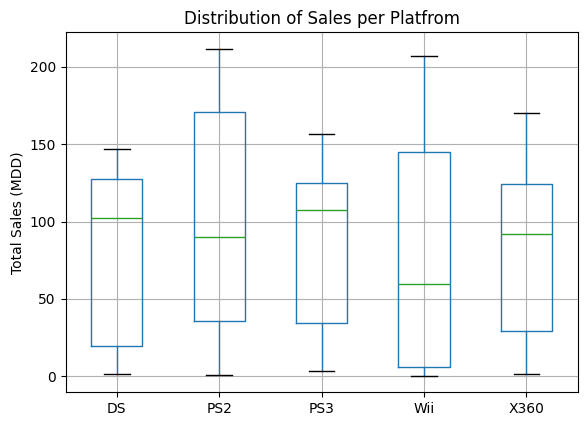

In [32]:
# Calcula las ventas totales por año y plataforma
sales_per_year = (
    games.groupby(["year_of_release", "platform"])["total_sales"].sum().reset_index()
)

# Filtra los datos para las plataformas con mayores ventas y crea un boxplot de las ventas totales por plataforma
sales_per_year[sales_per_year["platform"].isin(top_sales_platforms)][
    ["total_sales", "platform"]
].boxplot(
    column="total_sales",  # Columna a graficar
    by="platform",  # Agrupar por plataforma
)

# Configura el título y etiquetas del gráfico
plt.suptitle("")
plt.title("Distribution of Sales per Platfrom")
plt.xlabel("")
plt.ylabel("Total Sales (MDD)")

# Muestra gráfico
plt.show()

<div class="alert alert-block alert-warning">
    <b>Comentario del revisor</b> <a class="tocSkip"></a>
    
Recuerda que los graficos de box-plot nos ayudan a identificar outliers que posteriomente en el desarrollo de las pruebas de hipótesis nos servirían eliminar para que no puedan sesgar nuestros resultados.
</div>

La consola PS2 cuenta con un rango de ventas amplio y variado, la presencia de líneas de bigote tan largas (positiva y negativamente) indica que tuvo videojuegos con ventas extremadamente altas (superando los $250 MDD) y también extremadamente bajas. El mismo fenómeno se repite con la consola PS3, el Xbox 360 y el DS pero en un rango menor y en este caso sus videojuegos muestran una media de ventas más alta con respecto a su distribución lo cual indica que existieron múltiples juegos con un éxito alto para estas plataformas. En el caso de la consola Wii muestra también una alta variabilidad en las ventas de videojuegos con una media baja con respecto a su dispersión y un bigote positivo amplio esto sugiere que, esta plataforma en su mayoría tuvo ventas medias de alrededor de $50 MDD pero, las ventas de algunos de sus videojuegos más exitosos llegaron a ser de $200 MDD.

La media da las consolas PSP y 3DS muestran son relativamente bajas comparadas con otras consolas, indicando que la mayoría de sus juegos no alcanzaron ventas tan altas. Al mismo tiempo, las distribuciones más estrechas sugieren que las ventas en estas plataformas fueron consistentes y menos variables.

#### Ciclo de vida de las consolas <a class="anchor" id="lifecycle"></a>

In [33]:
# Crea una tabla pivote con las ventas totales por año y plataforma para las consolas más vendidas
sales_per_year_pivot = games[games["platform"].isin(top_sales_consoles)].pivot_table(
    index="year_of_release", columns="platform", values="total_sales", aggfunc="sum"
)

print("Consolas")
sales_per_year_pivot

Consolas


platform,PS,PS2,PS3,Wii,X360
year_of_release,,,,,
1994.0,6.03,NaN,NaN,NaN,NaN
1995.0,35.96,NaN,NaN,NaN,NaN
1996.0,94.70,NaN,NaN,NaN,NaN
1997.0,136.17,NaN,NaN,NaN,NaN
1998.0,169.49,NaN,NaN,NaN,NaN
1999.0,144.53,NaN,NaN,NaN,NaN
2000.0,96.37,39.17,NaN,NaN,NaN
2001.0,35.59,166.43,NaN,NaN,NaN
2002.0,6.67,205.38,NaN,NaN,NaN


In [34]:
# Crea una tabla pivote con las ventas totales por año y plataforma para las consolas portátiles más vendidas
sales_per_year_handheld_pivot = games[
    games["platform"].isin(top_sales_handheld)
].pivot_table(
    index="year_of_release", columns="platform", values="total_sales", aggfunc="sum"
)

print("Consolas portátiles")
sales_per_year_handheld_pivot

Consolas portátiles


platform,3DS,DS,GB,GBA,PSP
year_of_release,,,,,
1994.0,NaN,NaN,12.18,NaN,NaN
1995.0,NaN,NaN,3.60,NaN,NaN
1996.0,NaN,NaN,36.03,NaN,NaN
1997.0,NaN,NaN,6.37,NaN,NaN
1998.0,NaN,NaN,26.90,NaN,NaN
1999.0,NaN,NaN,38.00,NaN,NaN
2000.0,NaN,NaN,19.76,0.07,NaN
2001.0,NaN,NaN,9.24,61.53,NaN
2002.0,NaN,NaN,NaN,74.16,NaN


Observando el comportamiento de las ventas por productor

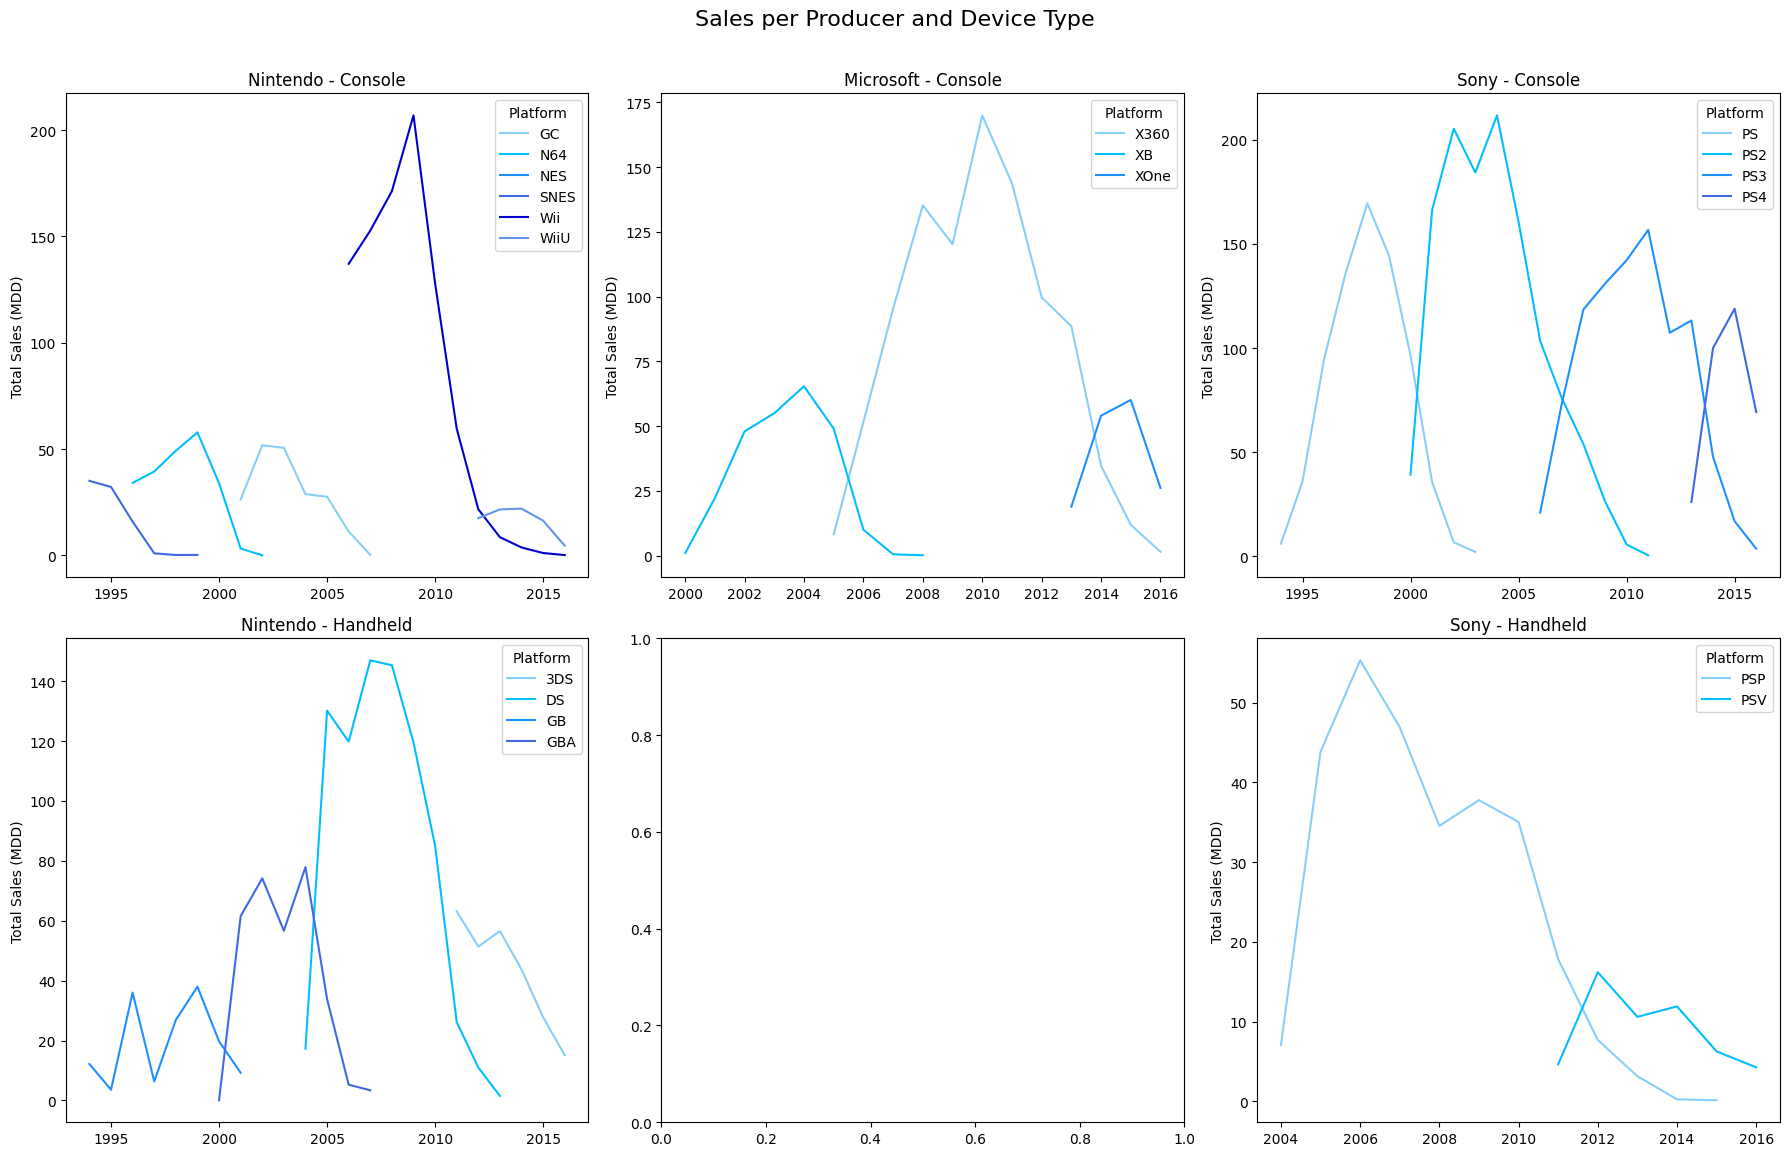

In [35]:
# Lista de tipos de dispositivo a analizar
colors = [
    "lightskyblue",
    "deepskyblue",
    "dodgerblue",
    "royalblue",
    "mediumblue",
    "cornflowerblue",
]

# Lista de los colores para los gráficos
device_types = ["Console", "Handheld"]

# Crea subplots de 2 filas por 3 columnas
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(18, 12))
fig.subplots_adjust(hspace=0.3, wspace=0.3)

# Crea gráficos por fabricante y tipo de dispositivo
for device_type, row in zip(device_types, axes):
    for ax, producer in zip(row, games["producer"].unique()):
        # Filtra datos
        filtered_data = games[
            (games["producer"] == producer) & (games["device_type"] == device_type)
        ]

        if not filtered_data.empty:
            # Pivotear los datos para la gráfica de líneas
            pivot = filtered_data.pivot_table(
                index="year_of_release",
                columns="platform",
                values="total_sales",
                aggfunc="sum",
            )

            # Graficar
            pivot.plot(kind="line", ax=ax, color=colors)
            ax.set_title(f"{producer} - {device_type}")
            ax.set_xlabel("")
            ax.set_ylabel("Total Sales (MDD)")
            ax.legend(title="Platform")


# Título principal
fig.suptitle("Sales per Producer and Device Type", fontsize=16, y=0.96)

# Ajusta el layout
fig.tight_layout(rect=[0, 0, 1, 0.95])  # Deja espacio para el título principal
plt.show()

El ciclo de vida de las consolas de videojuegos varía según el éxito de los videojuegos disponibles para cada modelo y la estrategia de lanzamiento de nuevos productos por parte de los fabricantes. Este ciclo generalmente oscila entre los 7 y los 12 años. Las ventas de videojuegos son un factor clave que determina cuándo una consola alcanza el final de su vida útil. Cuando las ventas empiezan a bajar, los fabricantes suelen lanzar nuevas consolas para mantener el interés del mercado.

En el caso de Nintendo, el ciclo de vida de sus consolas parece depender significativamente del éxito de los videojuegos asociados. Por ejemplo, consolas como el DS y el Wii lograron mantener altas ventas de videojuegos durante aproximadamente 10 años debido a su popularidad, mientras que otras consolas, como el GC y el Wii U, tuvieron ciclos de vida más cortos de alrededor de 7 años debido a menores ventas de videojuegos.

Las consolas de Microsoft también muestran una dependencia del éxito de sus videojuegos. Las ventas de videojuegos para el Xbox original duraron alrededor de 8 años, mientras que el Xbox 360 tuvo un ciclo de vida más prolongado, de aproximadamente 11 años, debido a su mayor éxito. Por otro lado, el Xbox One ya muestra una disminución en ventas de videojuegos, indicando que su ciclo de vida será menor a 10 años, lo que destaca la variabilidad basada en el éxito de los juegos.

Sony, por otro lado, tiende a mantener un ciclo de vida más prolongado para sus consolas. Tanto las consolas tradicionales como las portátiles de Sony han mostrado ventas de videojuegos durante alrededor de 10 años. Sin embargo, una excepción notable es el PS4, cuyas ventas de videojuegos comenzaron a disminuir hacia 2016, sugiriendo que su ciclo de vida podría ser más corto de lo esperado para una consola de Sony.

En general, las ventas de videojuegos determinan la longevidad de las consolas de videojuegos. Los fabricantes como Nintendo, Microsoft y Sony ajustan sus estrategias de lanzamiento basándose en las tendencias de ventas de videojuegos. Una tendencia común es que nuevas consolas se lanzan cuando las ventas de las consolas actuales comienzan a disminuir, asegurando una transición fluida y manteniendo el interés del mercado. Esto no solo ayuda a revitalizar las ventas, sino que también impulsa el desarrollo continuo de nuevos juegos, lo que a su vez prolonga el ciclo de vida de las plataformas.

### Relación entre las ventas totales y las reseñas de críticos y usuarios <a class="anchor" id="scores"></a>

In [36]:
games[["critic_score_float", "user_score_float"]].describe()

,critic_score_float,user_score_float
count,16079.000000,16079.000000
mean,70.004540,7.326954
std,9.857949,1.037493
min,13.000000,0.000000
25%,71.000000,7.500000
50%,71.000000,7.500000
75%,71.000000,7.500000
max,98.000000,9.700000


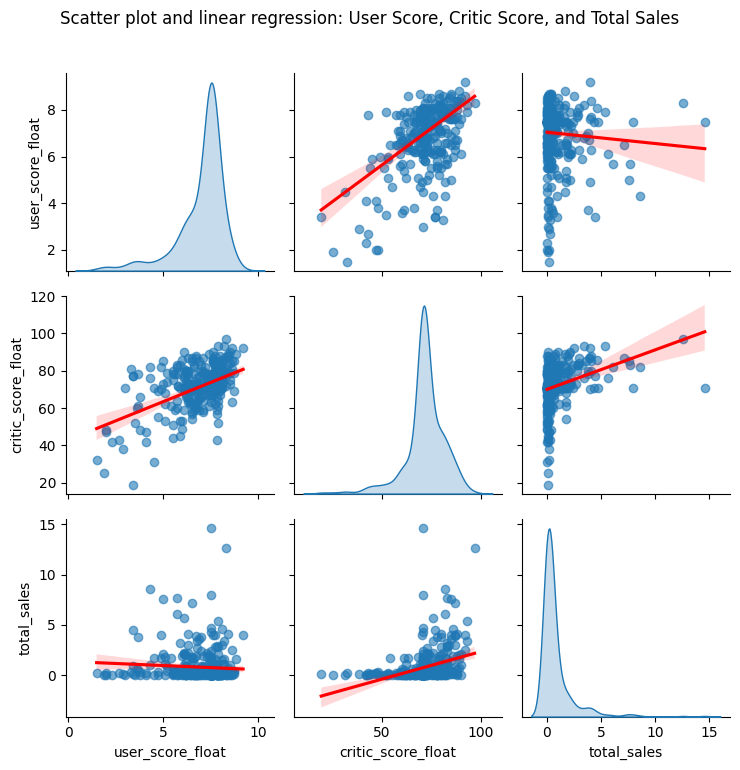

In [37]:
# Filtra los datos para la plataforma PS4
platform_name = "PS4"

# Selecciona las columnas relevantes y elimina valores ausentes
platform_scores = games[games["platform"] == platform_name][
    ["user_score_float", "critic_score_float", "total_sales"]
].dropna()

# Crea un pairplot para visualizar las relaciones entre las puntuaciones de usuario, de crítica y las ventas totales
pairplot = sns.pairplot(
    platform_scores,
    kind="reg",
    diag_kind="kde",
    plot_kws={"line_kws": {"color": "red"}, "scatter_kws": {"alpha": 0.6}},
)

# Configura del título del pairplot
pairplot.fig.suptitle(
    "Scatter plot and linear regression: User Score, Critic Score, and Total Sales",
    y=1.02,
    fontsize=12,
)

# Ajusta el layout
plt.tight_layout()

# Muestra el gráfico
plt.show()

<div class="alert alert-block alert-success">
    <b>Comentario del revisor</b> <a class="tocSkip"></a>
    
Muy buen trabajo con el análisis de la relación estre las scores y las ventas.
</div>

In [38]:
# DataFrame que contiene las reseñas de criticos, de usuarios y ventas totales
games_scores = games[["critic_score_float", "user_score_float", "total_sales"]].dropna()

# Calcula la correlación y el valor-p de Pearson para 'user_score_float' y 'total_sales'
correlation, p_value = st.pearsonr(
    games_scores["user_score_float"], games_scores["total_sales"]
)
print(
    f"Correlación entre reseñas de usuarios y ventas totales:\nCoeficiente de correlación: {correlation}\nP-valor: {p_value}"
)
print()

# Calcula la correlación entre 'user_score_float' y 'total_sales' para el PS4
correlation, p_value = st.pearsonr(
    platform_scores["user_score_float"], platform_scores["total_sales"]
)

print(
    f"Correlación entre reseñas de usuarios y ventas totales para el PS4:\nCoeficiente de correlación: {correlation}\nP-valor: {p_value}"
)

Correlación entre reseñas de usuarios y ventas totales:
Coeficiente de correlación: 0.0494255770428786
P-valor: 3.595291605999393e-10

Correlación entre reseñas de usuarios y ventas totales para el PS4:
Coeficiente de correlación: -0.06275557891282772
P-valor: 0.2150673283097884


In [39]:
# Calcula la correlación y el valor-p de Pearson para 'critic_score_float' y 'total_sales'
correlation, p_value = st.pearsonr(
    games_scores["critic_score_float"], games_scores["total_sales"]
)
print(
    f"Correlación entre reseñas de críticos y ventas totales:\nCoeficiente de correlación: {correlation}\nP-valor: {p_value}"
)
print()

# Calcula la correlación entre 'critic_score_float' y 'total_sales' para el PS4
correlation, p_value = st.pearsonr(
    platform_scores["critic_score_float"], platform_scores["total_sales"]
)

print(
    f"Correlación entre reseñas de críticos y ventas totales para el PS4:\nCoeficiente de correlación: {correlation}\nP-valor: {p_value}"
)

Correlación entre reseñas de críticos y ventas totales:
Coeficiente de correlación: 0.20177996462530684
P-valor: 2.3931580104985435e-147

Correlación entre reseñas de críticos y ventas totales para el PS4:
Coeficiente de correlación: 0.3387064530024632
P-valor: 5.606211465404271e-12


**Correlación entre las reseñas de usuarios y las ventas totales**

Se calculó el coeficiente de correlación de Pearson para determinar la correlación entre user_score_float y total_sales. El resultado del coeficiente de correlación de 0.088~ indica una correlación débil o casi inexistente. Sin embargo, el valor-p, al ser muy cercano a 0, indica que la correlación observada es estadísticamente significativa.

Aunque la correlación entre las reseñas de usuarios y las ventas totales sea estadísticamente significativa, la correlación positiva es muy débil y no sugiere una dependencia fuerte entre estas variables.

**¿Afectan las reseñas de usuarios a las ventas del PS4?**

Calculando la correlación entre las reseñas de usuarios y las ventas totales para el PS4, se obtuvo un coeficiente de correlación de -0.033~ y un valor-p de 0.597~. Con estos datos, se puede concluir que la correlación es básicamente inexistente (y de existir sería negativa) y un p-valor muy alto que indica una significancia muy baja para esta correlación.

Observando el gráfico de dispersión para estas variables, se puede apreciar que la mayoría de los datos se concentran en las reseñas de usuario de 4 a 8, y las ventas totales en su mayoría están por debajo de los $2.5 MDD.

Tanto la dispersión de los puntos en este gráfico como la línea de regresión no indican una relación ni positiva ni negativa entre estas variables. Se puede concluir que las reseñas de usuarios no son un factor relevante para las ventas totales del PS4.

**Correlación entre las reseñas de críticos y las ventas totales**

Al calcular la correlación entre las reseñas de críticos y las ventas totales para todas las plataformas, se obtuvo una correlación de 0.237~ y un valor-p que es básicamente 0. Esto puede indicar que exista una correlación baja pero significativa entre ambas variables.

**¿Afectan las reseñas de críticos a las ventas del PS4?**

Se obtuvo un coeficiente de correlación de 0.405~ y un valor-p de básicamente 0. Basado en esta información, parece que aunque las variables no tengan una correlación muy alta, esta correlación es significativa y podría indicar una dependencia entre las variables.

En el gráfico de dispersión, la mayoría de los datos va aumentando a medida que las reseñas de críticos son más altas. En general, la dispersión de datos no indica una varianza muy alta y al analizar la línea de regresión claramente hay una inclinación positiva, aunque no muy alta. Basado en esta información, se puede concluir que puede existir una correlación positiva entre las reseñas de críticos y las ventas totales del PS4.


### Comparación de ventas de los mismos juegos en diferentes plataformas <a class="anchor" id="games"></a>

In [40]:
# Agrupa el top 5 de los juegos más vendidos
top_sales_games_info = list(
    (
        games.groupby(["name"])["total_sales"]
        .sum()
        .sort_values(ascending=False)
        .reset_index()
        .head(5)
    )["name"]
)

# Crea un DF que contiene información relevante sobre los juegos más vendidos
top_sales_games_info = games[games["name"].isin(top_sales_games_info)][
    ["name", "genre", "platform", "producer", "total_sales"]
].head(5)
print(top_sales_games_info)
print()

# Agrupa los juegos más venidos por género
top_games_by_genre = (
    games.sort_values("total_sales", ascending=False)
    .groupby("genre")
    .head(1)
    .sort_values("total_sales", ascending=False)
    .head(10)
    .reset_index()
)[["name", "genre", "platform", "producer", "total_sales", "year_of_release"]]

print(top_games_by_genre)

                        name         genre platform  producer  total_sales
0                 Wii Sports        Sports      Wii  Nintendo        82.54
1             Mario Kart Wii        Racing      Wii  Nintendo        35.52
2          Wii Sports Resort        Sports      Wii  Nintendo        32.77
3   Pokemon Red/Pokemon Blue  Role-Playing       GB  Nintendo        31.38
13        Grand Theft Auto V        Action      PS3      Sony        21.05

                                          name         genre platform  \
0                                   Wii Sports        Sports      Wii   
1                               Mario Kart Wii        Racing      Wii   
2                     Pokemon Red/Pokemon Blue  Role-Playing       GB   
3                        New Super Mario Bros.      Platform       DS   
4                                     Wii Play          Misc      Wii   
5                                   Nintendogs    Simulation       DS   
6                           Grand Thef

Se crearon dos agrupaciones diferentes en `top_sales_games_info` se obtienen los videojuegos con mayores ventas totales y las plataformas en las que tuvieron más éxito. En la segunda agrupación `top_games_by_genre` se agrupan los juegos más vendidos por género. Así agrupemos por género o no, los videojuegos que más éxito han tenido se encuentran por mayoría en las consolas de Nintendo, específicamente del Wii. A pesar de que el Wii no es la consola que ha tenido mayores ventas, sí es la consola con videojuegos más exitosos. Estos videojuegos fueron desarrollados por Nintendo y para Nintendo por lo cual se tendrá que utilizar una lista de videojuegos diferente para este análisis.

In [41]:
# Crea la lista de juegos que están en múltiples plataformas
multiplatform_games = games.groupby("name")[
    "platform"
].nunique()  # Cuenta el total de plataformas en las que se publicó el juego
multiplatform_games = multiplatform_games[
    multiplatform_games >= 2
].index  # Filtra para que solo se guarden los juegos que se publicaron para 5 plataformas o más

# Filtra los juegos que existen en múltiples plataformas y que sus plataformas son consolas no portátiles
top_sales_multiplatform_games = games[(games["name"].isin(multiplatform_games))]

# Agrupa los juegos más vendidos en múltiples plataformas y convierte la agrupación en una lista
top_sales_multiplatform_games = list(
    top_sales_multiplatform_games.groupby("name")["total_sales"]
    .sum()
    .sort_values(ascending=False)
    .head(4)
    .index
)

print(
    "Top 5 juegos más vendidos en múltiples plataformas:", top_sales_multiplatform_games
)

Top 5 juegos más vendidos en múltiples plataformas: ['Grand Theft Auto V', 'Call of Duty: Modern Warfare 3', 'Call of Duty: Black Ops II', 'Call of Duty: Black Ops']


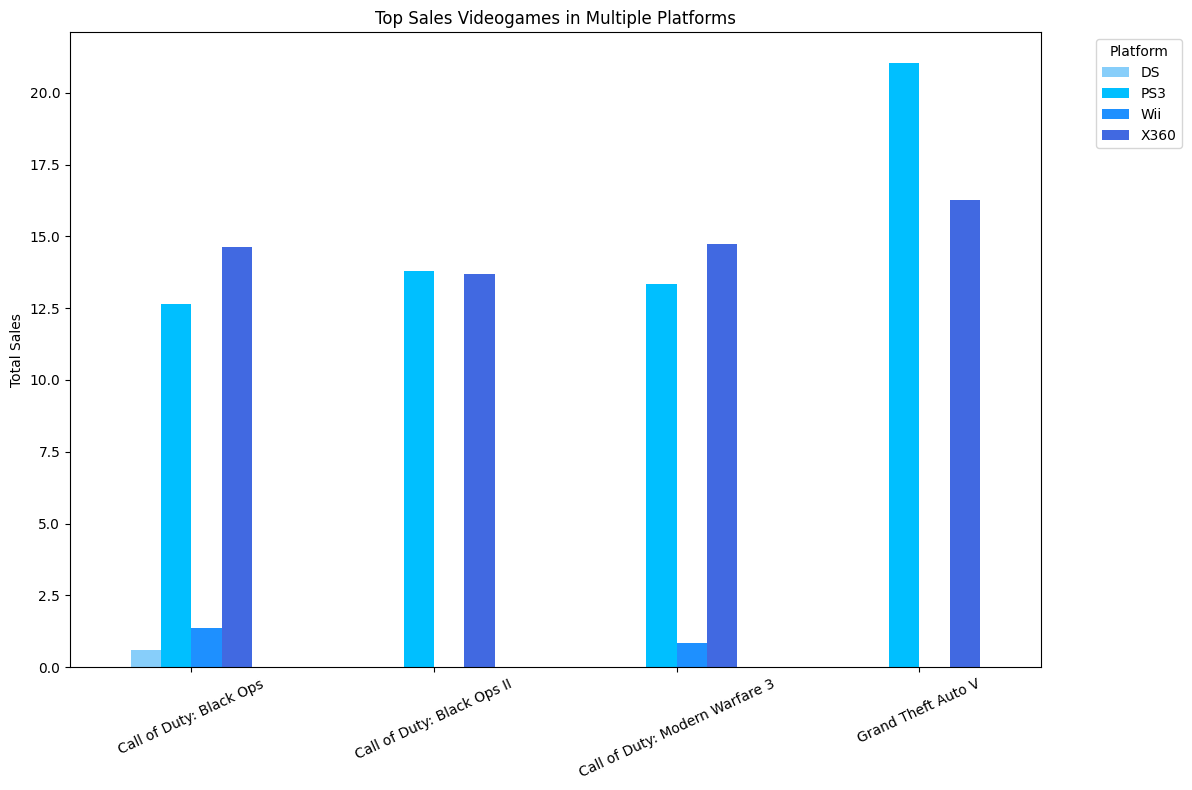

In [42]:
# Lista de los colores para graficar
colors = ["lightskyblue", "deepskyblue", "dodgerblue", "royalblue", "mediumblue"]

# DF que contiene los juegos con éxito en múltiples plataformas y toma solo las plataformas con mayores ventas
sales_data = games[
    games["name"].isin(top_sales_multiplatform_games)
    & games["platform"].isin(top_sales_platforms)
]

# Crear la gráfica
fig, ax = plt.subplots(figsize=(12, 8))

# Crear una tabla pivot para que `name` sea el índice, `platform` las columnas, y `total_sales` los valores
sales_pivot = sales_data.pivot_table(
    index="name", columns="platform", values="total_sales", aggfunc="sum"
)

# Plot de barras apiladas
sales_pivot.plot(kind="bar", ax=ax, rot=25, color=colors)

# Configuración de la gráfica
ax.set_title("Top Sales Videogames in Multiple Platforms")
ax.set_xlabel("")
ax.set_ylabel("Total Sales")
ax.legend(title="Platform", bbox_to_anchor=(1.05, 1), loc="upper left")

# Mostrar la gráfica
plt.tight_layout()
plt.show()

El gráfico de barras compara las ventas del top 5 de videojuegos más vendidos que fueron lanzados para 5 consolas diferentes o más. A diferencia del análisis inicial en el que se compararon los juegos más vendidos por género en los cuales las consolas de Nintendo fueron las líderes, cuando se comparan los juegos más exitosos en múltiples plataformas, Nintendo no se encuentra entre los líderes.

Parece que los juegos más exitosos en múltiples plataformas son sobre todo de acción y disparos, y tienen mayor éxito en las consolas de PlayStation, seguido por el Xbox 360, el PC, y finalmente Wii. Esto sugiere que los juegos de estos géneros tienen una mayor audiencia y ventas en consolas de Sony y Microsoft, en comparación con las de Nintendo.

Los juegos con mayores éxitos históricamente son de Nintendo y son en géneros en su mayoría de deportes y carreras. Lanzar videojuegos exclusivamente para plataformas de Nintendo corre el riesgo de dejar de ser jugados una vez que el éxito de la consola culmine. Los juegos con mayor éxito en Nintendo son juegos lanzados entre 2005 y 2008. Este período coincide con la popularidad del Wii, que dominó el mercado en esos años. Sin embargo, después de 2010, las ventas de juegos de Nintendo disminuyeron significativamente, reflejando la disminución en la popularidad de sus consolas.

<div class="alert alert-block alert-success">
    <b>Comentario del revisor</b> <a class="tocSkip"></a>

Excelente trabajo con este análisis de comparación de juegos por platafora. Esto brinda mucha información respecto a lo que veníamos analizando en los pasos anteriores.     
</div>

### Distribución de los juegos por género <a class="anchor" id="genre"></a>

In [43]:
# Guarda una lista con los géneros más rentables
top_sales_genres = list(
    games.groupby("genre")["total_sales"]
    .sum()
    .sort_values(ascending=False)
    .head(5)
    .index
)
print("Géneros con mayores ventas", top_sales_genres)

# Filtra el DF con juegos lanzados después del 2010
recent_years_games = games.query("year_of_release > 2010")

# Guarda una lista con los géneros más rentables para los juegos lanzados despúes del 2010
top_sales_genres_recent = list(
    recent_years_games.groupby("genre")["total_sales"]
    .sum()
    .sort_values(ascending=False)
    .head(5)
    .index
)
print("Géneros con mayores ventas lanzados después del 2010", top_sales_genres_recent)

Géneros con mayores ventas ['Action', 'Sports', 'Shooter', 'Role-Playing', 'Misc']
Géneros con mayores ventas lanzados después del 2010 ['Action', 'Shooter', 'Role-Playing', 'Sports', 'Misc']


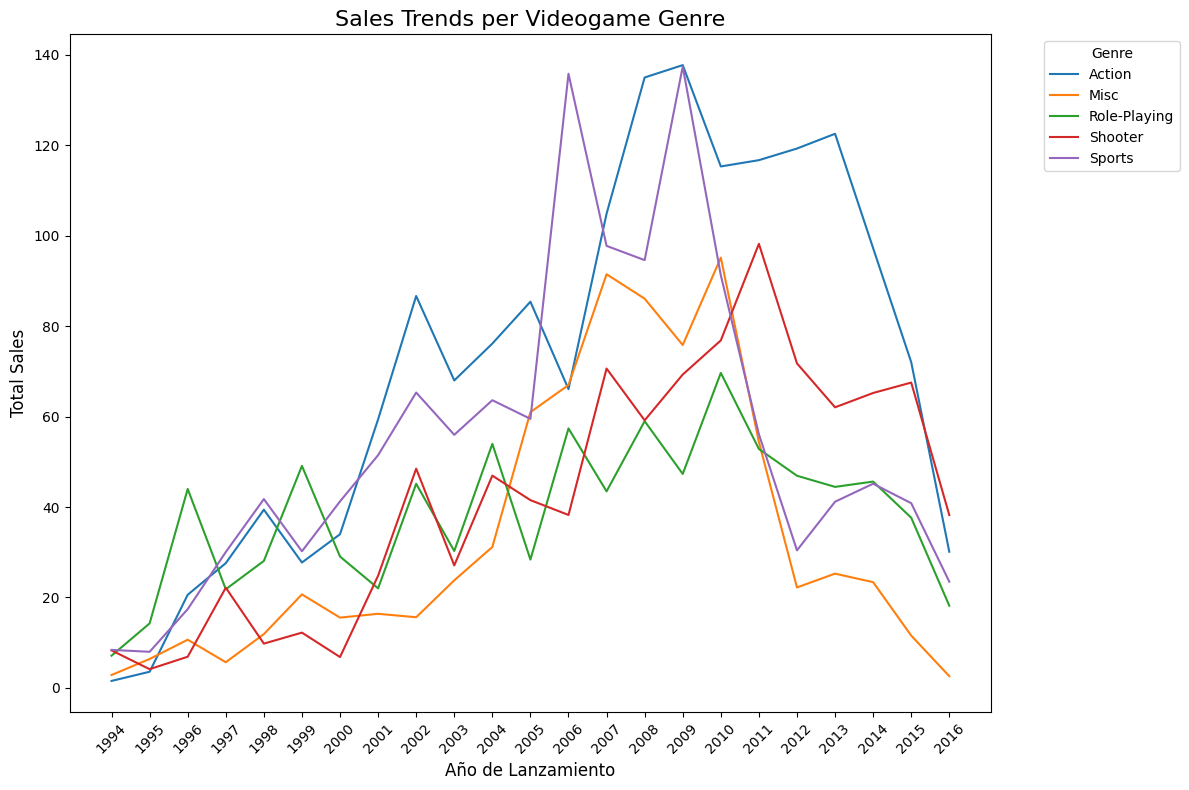

In [44]:
# Crea una tabla pivote con ventas totales por año y género
pivot_sales_genre = games[games["genre"].isin(top_sales_genres)].pivot_table(
    index="year_of_release", columns="genre", values="total_sales", aggfunc="sum"
)

# Configura la figura y los ejes
fig, ax = plt.subplots(figsize=(12, 8))

# Genera un gráfico de línea para cada género
for genre in pivot_sales_genre.columns:
    ax.plot(
        pivot_sales_genre.index,
        pivot_sales_genre[genre],
        label=genre,
    )

# Configura el título, etiquetas y leyenda
ax.set_title("Sales Trends per Videogame Genre", fontsize=16)
ax.set_xlabel("Año de Lanzamiento", fontsize=12)
ax.set_ylabel("Total Sales", fontsize=12)
ax.legend(title="Genre", bbox_to_anchor=(1.05, 1), loc="upper left")

# Mejora el formato del eje X (años)
plt.xticks(pivot_sales_genre.index, rotation=45)


# Muestra el gráfico
plt.tight_layout()
plt.show()

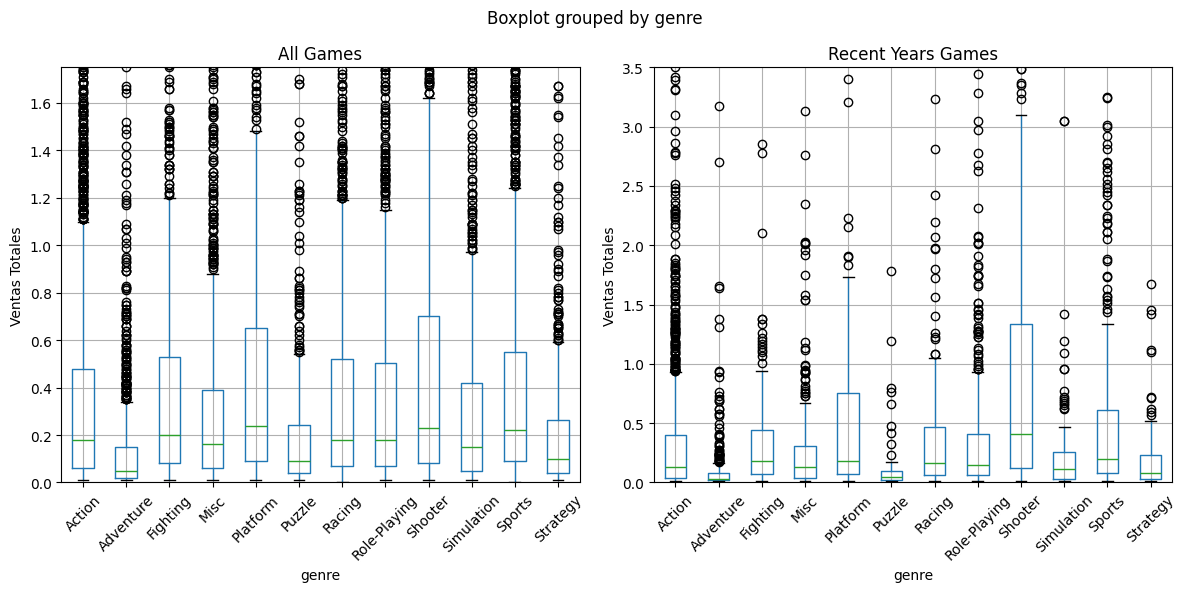

In [45]:
# Configura la figura con 3 subplots en una fila
fig, axes = plt.subplots(ncols=2, figsize=(12, 6))

# Títulos para los subplots
titles = ["All Games", "Recent Years Games"]

# Datos para los subplots
data_frames = [games, recent_years_games]

# Límites de eje Y
y_lims = [(0, 1.75), (0, 3.5)]

# Genera los boxplots
for ax, df, title, ylim in zip(axes, data_frames, titles, y_lims):
    df.boxplot(column="total_sales", by="genre", ax=ax, vert=True, grid=True)
    ax.set_title(f"{title}")
    ax.set_ylabel("Ventas Totales")
    ax.set_ylim(ylim)  # Establecer el límite del eje y para cada subplot

    # Rota las etiquetas del eje x
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45)


# Ajusta diseño
plt.tight_layout()
plt.show()

Los géneros Misceláneo y Deportes han experimentado una notable disminución en popularidad desde 2012, a pesar de ser altamente populares en el pasado. Esto es similar al comportamiento observado en las ventas de videojuegos para las consolas de Nintendo.

Los géneros Acción y Disparos han ganado una significativa popularidad en años recientes, especialmente desde 2010. Este cambio puede estar influenciado por los avances en gráficos y jugabilidad que hacen estos juegos más atractivos.

Al comparar las distribuciones de las ventas por géneros, podemos concluir que a grandes rasgos, los juegos de: Aventura, Puzzle, y Estrategia  han sido los menos exitosos. A esta lista le podemos añadir los juegos de Simulación al comparar este género con el éxito que han tenido otros géneros en años más recientes.

Los juegos de Disparos han tenido un gran crecimiento en años recientes. Su media de ventas es más alta que cualquier otra categoría, rondando los $0.4 MDD, desde el 2010 se lanzaron juegos con una alta
popularidad superando las ventas de los $3 MDD para este género.

Los géneros de Acción, Peleas, Carreras, Rol y Deportes presentan distribuciones de ventas similares, con medias inferiores a los $0.2 millones de dólares. Sin embargo, en años más recientes, se ha observado que los juegos de Deporte y Plataforma han tenido mayor éxito en términos de ventas, destacando una ligera preferencia por estos géneros en el mercado actual.


### Perfil de usuario por región <a class="anchor" id="region"></a>

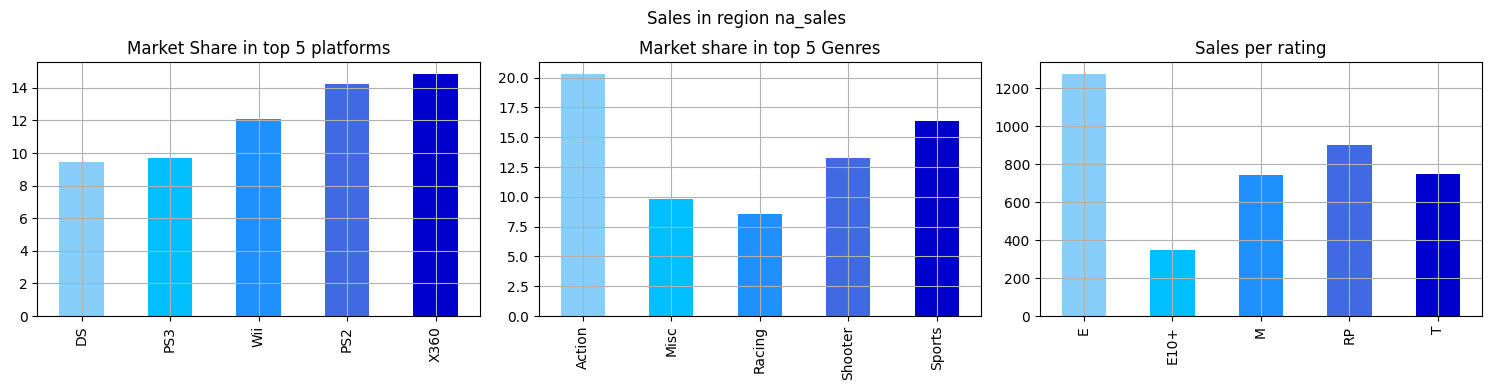

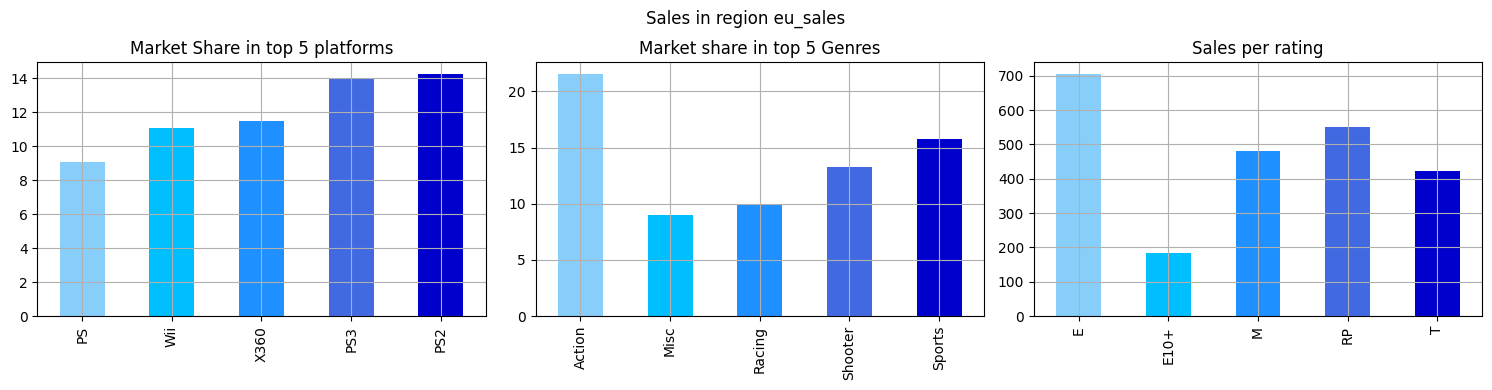

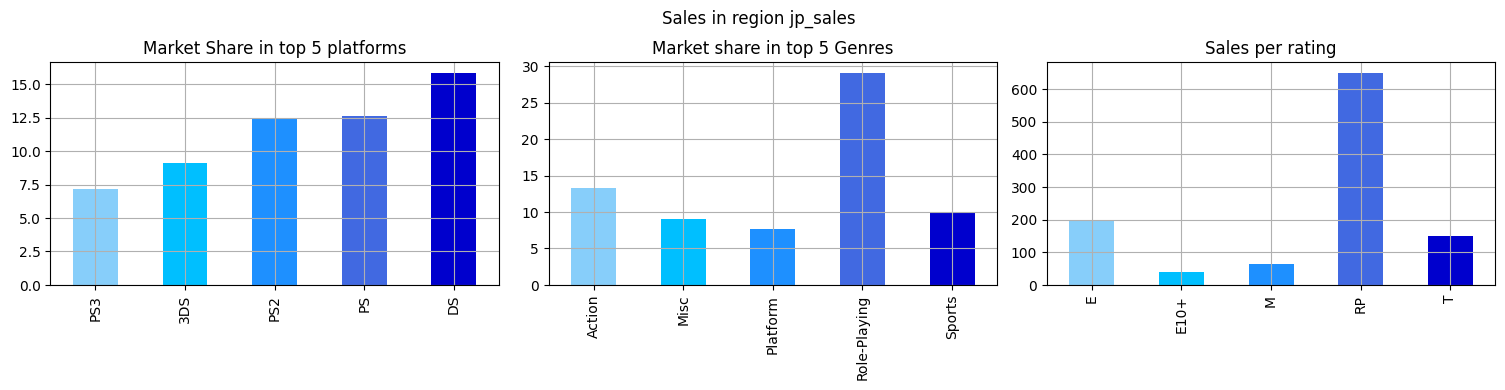

In [46]:
# Lista de los nombres de las regiones
regions = ["na_sales", "eu_sales", "jp_sales"]

# Lista de colores para graficar
colors = ["lightskyblue", "deepskyblue", "dodgerblue", "royalblue", "mediumblue"]

# Itera por cada region en la lista de regions
for region in regions:

    # Agrupación de plataformas por región
    sales_by_platform = games.groupby("platform")[region].sum()
    top_5_patforms = sales_by_platform.sort_values().tail(5).reset_index()
    top_5_patforms["market_share"] = (
        top_5_patforms[region] / sales_by_platform.sum()
    ) * 100

    # Agrupación de género por región
    top_5_genres = (
        games.groupby("genre")[region].sum().sort_values().tail(5).reset_index()
    )
    top_5_genres = top_5_genres.sort_values(by="genre")
    top_5_genres["market_share"] = (
        top_5_genres[region] / sales_by_platform.sum()
    ) * 100

    # Agrupación de rating por región
    rating_group = games.groupby("rating")[region].sum()
    rating_sorted = rating_group.sort_values().tail(5).reset_index()
    rating_sorted["market_share"] = (rating_sorted[region] / rating_group.sum()) * 100

    rating_sorted = rating_sorted.sort_values(by="rating")

    fig, axes = plt.subplots(ncols=3, figsize=(15, 4))
    fig.suptitle(f"Sales in region {region}", y=0.96)

    # Configura el gráfico de la cuota de mercado por plataforma
    axes[0].set_title("Market Share in top 5 platforms")
    top_5_patforms.plot(
        kind="bar",
        x="platform",
        y="market_share",
        xlabel="",
        ax=axes[0],
        legend=False,
        grid=True,
        color=colors,
    )

    # Configura el gráfico de la cuota de mercado por género
    axes[1].set_title("Market share in top 5 Genres")
    top_5_genres.plot(
        kind="bar",
        x="genre",
        y="market_share",
        xlabel="",
        ax=axes[1],
        legend=False,
        grid=True,
        color=colors,
    )

    # Configura el gráfico de las ventas por rating
    axes[2].set_title("Sales per rating")
    rating_sorted.plot(
        kind="bar",
        x="rating",
        y=region,
        xlabel="",
        ax=axes[2],
        legend=False,
        grid=True,
        color=colors,
    )

    # Ajusta el layout
    fig.tight_layout(pad=1)

# Muestra los gráficos
plt.show()

In [47]:
role_playing_ratings = games[games["genre"] == "Role-Playing"]["rating"].value_counts()
print(role_playing_ratings)

rating
RP      681
T       415
M       161
E10+    111
E        83
Name: count, dtype: int64


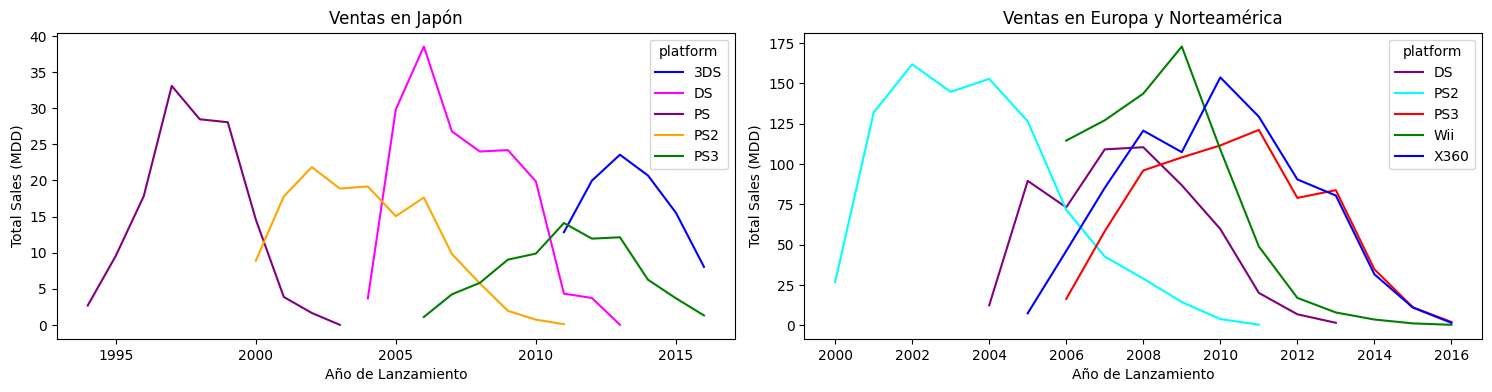

In [48]:
# Definir colores específicos para cada plataforma
colors = {
    "DS": "blue",
    "PS3": "green",
    "Wii": "red",
    "PS2": "purple",
    "3DS": "orange",
    "X360": "cyan",
    "PS": "magenta",
    "GB": "yellow",
    "GBA": "brown",
    "PSP": "pink",
}


# Crear una lista de las plataformas con mayores ventas en Japón
top_sales_platforms_jp = list(
    games.groupby("platform")[
        "jp_sales"
    ]  # Agrupa por plataforma y suma las ventas totales
    .sum()
    .sort_values(ascending=False)  # Ordena las ventas en orden descendente
    .head(5)  # Toma las 5 primeras plataformas
    .index  # Obtiene los nombres de las plataformas
)

# Crear un DataFrame con las ventas en Europa y Norteamérica
games_eu_na = games[["platform", "eu_sales", "na_sales", "year_of_release"]].copy()
games_eu_na["total_sales"] = (
    games_eu_na["eu_sales"] + games_eu_na["na_sales"]
)  # Agrega una columna con las ventas totales en Europa y Norteamérica

# Crear una lista de las plataformas con mayores ventas en Europa y Norteamérica
top_sales_platforms_eu_na = list(
    games_eu_na.groupby("platform")[
        "total_sales"
    ]  # Agrupa por plataforma y suma las ventas totales
    .sum()
    .sort_values(ascending=False)  # Ordena las ventas en orden descendente
    .head(5)  # Toma las 5 primeras plataformas
    .index  # Obtiene los nombres de las plataformas
)

# Crear una figura con dos subplots (gráficos)
fig, ax = plt.subplots(ncols=2, figsize=(15, 4))

# Crear un gráfico de líneas para las ventas en Japón
games[games["platform"].isin(top_sales_platforms_jp)].pivot_table(
    index="year_of_release", columns="platform", values="jp_sales", aggfunc="sum"
).plot(
    kind="line",
    title="Ventas en Japón",
    xlabel="Año de Lanzamiento",
    ylabel="Total Sales (MDD)",
    ax=ax[0],
    color=[colors.get(x, "black") for x in top_sales_platforms_jp],
)  # Usar ax[0] para el primer gráfico

# Crear un gráfico de líneas para las ventas en Europa y Norteamérica
games_eu_na[games_eu_na["platform"].isin(top_sales_platforms_eu_na)].pivot_table(
    index="year_of_release", columns="platform", values="total_sales", aggfunc="sum"
).plot(
    kind="line",
    title="Ventas en Europa y Norteamérica",
    xlabel="Año de Lanzamiento",
    ylabel="Total Sales (MDD)",
    ax=ax[1],
    color=[colors.get(x, "black") for x in top_sales_platforms_eu_na],
)  # Usar ax[1] para el segundo gráfico

# Ajustar el layout de la figura para evitar solapamientos
fig.tight_layout(pad=1)

# Mostrar los gráficos
plt.show()

**Cuotas de mercado por consola:**
* En **Norte América** las plataformas más populares están básicamente empatadas. El Xbox 360 lidera con una cuota de mercado del 14.82%, seguido por el PS2 con el 14.25%. El Wii ocupa el tercer lugar con el 12.11% de las ventas, mientras que el PS3 y el DS tienen cuotas de mercado similares, con 9.70% y 9.46%, respectivamente.

* Para las ventas en **Europa** la consola con el mayor porcentaje de ventas es el PS2 con 14.21%, similar a la cuota de mercado en Norte América. Le sigue el PS3 con 13.98%, y el Xbox 360 se encuentra en tercer lugar con una cuota del 11.46%. El Wii cuenta con una cuota de mercado significativa con el 11% y el PlayStation sigue teniendo popularidad con el 9% de la cuota de mercado.

* En **Japón** es donde se encuentran mayores diferencias pues el DS es la consola más popular superando el 15% de cuota de mercado. En segundo y tercer lugar están el Playstation y Playstation 2 que parecen tener casi la misma cuota de mercado con un 12.5%. El 3DS tiene una cuota de mercado de alrededor del 9% y por último el Playstation 3 que tiene una cuota de menos del 7.5%.


**Géneros más populares:**
* Los géneros populares en **Norte América** y **Europa** son los mismos y casi todos en los mismos porcentajes de ventas. Sin embargo en Norte América, los juegos Misceláneos son más vendidos que los de Carreras, mientras que en Europa sucede lo contrario. Los tres géneros más vendidos en ambas regiones son Acción, Deportes y Disparos.

* En el caso de **Japón**, los Juegos de Rol son significativamente más populares que el resto de los géneros, con una cuota de mercado de casi el 30%. Los juegos de Acción son los segundos más vendidos, con una cuota de menos del 15%, y los juegos de Deportes son los terceros más populares, con una cuota del 10%.

**¿El rating afecta a las ventas regionales?**
* Para **Norte América** y **Europa** , parece que el rating de los videojuegos les afecta en igual medida. Los videojuegos más vendidos son los de clasificación Everyone, seguidos por Rating Pending. La diferencia principal es que en Europa los juegos de clasificación Mature son los terceros más cosumidos y en Norte América son los Teen que casi están empatados con Mature.
* En **Japón**, los videojuegos más consumidos tienen el rating pendiente, luego le siguen los de clasificación Everyone y finalmente los de clasificación Teen.

**Conclusión**

Los mercados de Norte América y Europa tienen comportamientos muy similares. Se puede esperar que utilicen las mismas consolas, consuman los mismos géneros de videojuegos y que las clasificaciones de edad los afecten de manera similar. En contraste, Japón muestra diferencias significativas, con Nintendo dominando el mercado de una manera similar a como Sony lo hace en Norte América y Europa. Mientras que en Europa y Norte América las consolas más populares ya han concluido su ciclo de vida, en Japón se siguen consumiendo juegos en el 3DS. El género de videojuegos más consumido en Japón es el de Rol, lo cual es notablemente diferente a lo observado en otras regiones, donde Role-Playing no está ni en el top 3.

En cuanto a las clasificaciones por edad en Japón, es difícil llegar a una conclusión definitiva, ya que la clasificación más popular es "Rating Pending". Esto podría estar relacionado con las clasificaciones de los juegos de Rol, pero no necesariamente es la causa. Si se ignoran las clasificaciones pendientes, se observa que en todas las regiones los videojuegos más consumidos son los clasificados para todas las edades (E), y en segundo lugar están los de clasificación Teen (adolescentes) y M (público maduro). De manera preliminar, se podría decir que las clasificaciones de edad influyen en las ventas de videojuegos cuando están disponibles.

Las diferencias entre estos mercados pueden deberse a factores culturales. Norte América y Europa comparten muchos aspectos culturales occidentales, como creencias religiosas, gastronomía y, especialmente, el idioma, lo cual influye en la multimedia que consumen. Japón, con su cultura distinta, muestra preferencias diferentes tanto en consolas como en géneros de videojuegos, reflejando un mercado único y específico.

<div class="alert alert-block alert-success">
<b>Comentario del revisor:</b> <a class="tocSkip"></a>

Excelente! Con este análisis por región ayuda a complementar el análisis general anterior y a hacer zoom a los resultados por cada una de las regiones.   

</div>

## Pruebas de hipótesis <a class="anchor" id="hipotesis"></a>

In [146]:
def remove_outliers(df):
    # Seleccionar solo las columnas numéricas
    numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns

    for col in numeric_cols:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        # Filtrar los datos para eliminar los outliers
        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    
    return df

# Aplicar la función al DataFrame
games_cleaned_test = remove_outliers(games)

print(f"Tamaño original del DataFrame: {games.shape}")
print(f"Tamaño del DataFrame sin outliers: {games_cleaned_test.shape}")

Tamaño original del DataFrame: (16079, 16)
Tamaño del DataFrame sin outliers: (5051, 16)


In [147]:
# Función para eliminar outliers utilizando el método IQR
def remove_outliers_iqr(df, column, platform_col):
    platforms = df[platform_col].unique()
    df_filtered = pd.DataFrame()
    
    for platform in platforms:
        platform_df = df[df[platform_col] == platform]
        
        Q1 = platform_df[column].quantile(0.25)
        Q3 = platform_df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        platform_filtered = platform_df[(platform_df[column] >= lower_bound) & (platform_df[column] <= upper_bound)]
        df_filtered = pd.concat([df_filtered, platform_filtered])
    
    return df_filtered

# Aplicar la función al DataFrame
games_filtered = remove_outliers_iqr(games, "user_score_float", "platform")

# Imprimir las formas de los DataFrames
print("Original games shape:", games.shape)
print("Filtered games shape:", games_filtered.shape)
print("Number of removed outliers:", games.shape[0] - games_filtered.shape[0])

# Aplicar la función al DataFrame
games_cleaned = remove_outliers_iqr(games_filtered, "user_score_float", "genre")

# Imprimir las formas de los DataFrames
print("Original games shape:", games_filtered.shape)
print("Filtered games shape:", games_cleaned.shape)
print("Number of removed outliers:", games_filtered.shape[0] - games_cleaned.shape[0])


Original games shape: (16079, 16)
Filtered games shape: (13227, 16)
Number of removed outliers: 2852
Original games shape: (13227, 16)
Filtered games shape: (9371, 16)
Number of removed outliers: 3856


In [192]:
# Crear una copia del DataFrame original
games_filtered = games.copy()

# Filtrar los datos para PC
games_filtered = games_filtered[~((games_filtered["platform"] == "PC") & (games_filtered["user_score_float"] < 6))]

# Filtrar los datos para XOne
games_filtered = games_filtered[~((games_filtered["platform"] == "XOne") & (games_filtered["user_score_float"] < 4.5))]

# Filtrar los datos para el género de acción
games_filtered = games_filtered[~((games_filtered["genre"] == "Action") & ((games_filtered["user_score_float"] > 9) | (games_filtered["user_score_float"] < 5)))]

# Imprimir las formas de los DataFrames
print("Original games shape:", games.shape)
print("Filtered games shape:", games_filtered.shape)
print("Number of removed outliers:", games.shape[0] - games_filtered.shape[0])


Original games shape: (16079, 16)
Filtered games shape: (15723, 16)
Number of removed outliers: 356


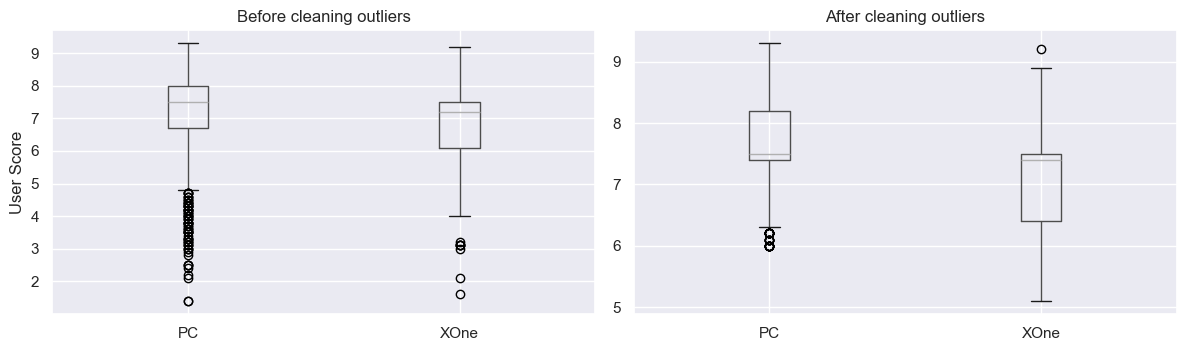

In [193]:
# Definir las plataformas de interés
hipotesis_platforms = ['PC', 'XOne']

# Crear una figura con dos subplots (gráficos)
fig, ax = plt.subplots(ncols=2, figsize=(12, 4))

# Crear boxplot antes de limpiar outliers
games[games['platform'].isin(hipotesis_platforms)].boxplot(column='user_score_float',by='platform',ax=ax[0])
ax[0].set_title('Before cleaning outliers')
ax[0].set_xlabel('')
ax[0].set_ylabel('User Score')


# Crear boxplot después de limpiar outliers
games_filtered[games_filtered['platform'].isin(hipotesis_platforms)].boxplot(column='user_score_float',by='platform',ax=ax[1])
ax[1].set_title('After cleaning outliers')
ax[1].set_xlabel('')

# Ajustar el layout de la figura para evitar solapamientos
fig.tight_layout(pad=1)

# Mostrar los gráficos
plt.suptitle('')  # Eliminar el título superpuesto por defecto
plt.show()

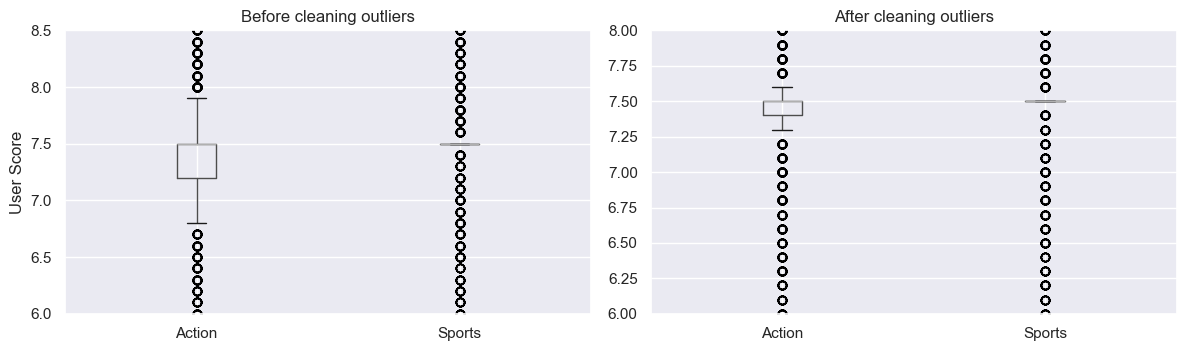

In [194]:
# Definir las plataformas de interés
hipotesis_genres = ['Action', 'Sports']

# Crear una figura con dos subplots (gráficos)
fig, ax = plt.subplots(ncols=2, figsize=(12, 4))

# Crear boxplot antes de limpiar outliers
games[games['genre'].isin(hipotesis_genres)].boxplot(column='user_score_float', by='genre', ax=ax[0])
ax[0].set_title('Before cleaning outliers')
ax[0].set_xlabel('')
ax[0].set_ylabel('User Score')
ax[0].set_ylim([6,8.5])

# Crear boxplot después de limpiar outliers
games_filtered[games_filtered['genre'].isin(hipotesis_genres)].boxplot(column='user_score_float', by='genre', ax=ax[1])
ax[1].set_title('After cleaning outliers')
ax[1].set_xlabel('')
ax[1].set_ylim([6,8])


# Ajustar el layout de la figura para evitar solapamientos
fig.tight_layout(pad=1)

# Mostrar los gráficos
plt.suptitle('')  # Eliminar el título superpuesto por defecto
plt.show()

In [175]:
games[games['genre']=='Sports']['user_score_float'].describe()

count    2260.000000
mean        7.237611
std         1.152898
min         0.200000
25%         7.500000
50%         7.500000
75%         7.500000
max         9.500000
Name: user_score_float, dtype: float64

### Filtrando outliers

###  Las reseñas promedio de los usuarios para las plataformas Xbox One y PC son las mismas <a class="anchor" id="test1"></a>

H0: Las medias de las reseñas promedio de los usuarios de Xbox One y PC no son diferentes (μ1 = μ2) <br>
H1: Las medias de las reseñas promedio de los usuarios de Xbox One y PC son diferentes (μ1 ≠ μ2)

Nivel de significación del 5%.

In [53]:
xbox = no_outliers_games[no_outliers_games["platform"] == "XOne"][
    "user_score_float"
].dropna()
pc = no_outliers_games[no_outliers_games["platform"] == "PC"][
    "user_score_float"
].dropna()
alpha = 0.05

print(xbox.var(), pc.var())

1.501965707643127 1.6573258972073062


In [54]:
# Prueba si las varianzas de las muestras son similares
stat, p_value = st.levene(xbox, pc)
print(f"Statistic: {stat}, p-value: {p_value}")

if p_value < alpha:
    print(
        "Las varianzas son significativamente diferentes. Rechazamos la hipótesis nula."
    )
else:
    print(
        "No hay evidencia suficiente para decir que las varianzas son diferentes. No podemos rechazar la hipótesis nula."
    )

Statistic: 0.06842276390643139, p-value: 0.7937085078423947
No hay evidencia suficiente para decir que las varianzas son diferentes. No podemos rechazar la hipótesis nula.


In [55]:
# Prueba si las medias de las muestras son las mismas
stat, p_value = st.ttest_ind(xbox, pc)  # realizar una prueba
print(f"Statistic: {stat}, p-value: {p_value}")

if p_value < alpha:  # comparar el valor p con el umbral
    print("Las medias son significativamente diferentes. Rechazamos la hipótesis nula")
else:
    print(
        "No hay evidencia suficiente para decir que las medias son diferentes. No podemos rechazar la hipótesis nula"
    )

Statistic: -0.5850462057699891, p-value: 0.5586667953127963
No hay evidencia suficiente para decir que las medias son diferentes. No podemos rechazar la hipótesis nula


H0: Las medias de reseñas de usuarios para Acción y Deporte son diferentes son diferentes (μ1 ≠ μ2)<br>
H1: Las medias de reseñas de usuarios para Acción y Deporte  no son diferentes (μ1 = μ2)

Nivel de significancia del 5%.

In [56]:
action = games[games["genre"] == "Action"]["user_score_float"].dropna()
sports = games[games["genre"] == "Sports"]["user_score_float"].dropna()

alpha = 0.05

print(action.var(), sports.var())

1.1766801289907103 1.3291735712019181


In [57]:
# Prueba si las varianzas de las muestras son similares
stat, p_value = st.levene(action, sports)
print(f"Statistic: {stat}, p-value: {p_value}")

if p_value < alpha:
    print(
        "Las varianzas son significativamente diferentes. Rechazamos la hipótesis nula."
    )
else:
    print(
        "No hay evidencia suficiente para decir que las varianzas son diferentes. No podemos rechazar la hipótesis nula."
    )

Statistic: 0.15121135168660668, p-value: 0.6973955214726704
No hay evidencia suficiente para decir que las varianzas son diferentes. No podemos rechazar la hipótesis nula.


<div class="alert alert-block alert-success">
<b>Comentario revisor</b> <a class="tocSkip"></a>

Excelente trabajo!! Es importante mostrar si se cumplen los supuestos cuandor realizamos pruebas de hipótesis.
</div>

In [58]:
# Prueba si las medias de las muestras son las mismas
stat, p_value = st.ttest_ind(action, pc)  # realizar una prueba
print(f"Statistic: {stat}, p-value: {p_value}")

if p_value < alpha:
    print(
        f"Rechazamos la hipótesis nula: no hay suficiente evidencia para afirmar que las medias son diferentes."
    )
else:
    print(
        f"No rechazamos la hipótesis nula: hay suficiente evidencia para afirmar que las medias son diferentes."
    )

Statistic: 10.185363498633352, p-value: 4.584765104317052e-24
Rechazamos la hipótesis nula: no hay suficiente evidencia para afirmar que las medias son diferentes.


Se realizó el mismo procedimiento para confirmar si las varianzas de las reseñas de usuarios para los géneros de Acción y Deporte eran similares, resultaron ser diferentes y entonces se estableció `equalVar=False`, los resultados del t-test indican que las medias son significativamente diferentes y entonces no se puede rechazar la hipótesis nula de que las reseñas de usuarios promedio para los géneros de Acción y Deporte son diferentes.

<div class="alert alert-block alert-success">
<b>Comentario revisor</b> <a class="tocSkip"></a>

Realizaste de manera perfecta las pruebas de hipótesis.
</div>

## Conclusión  <a class="anchor" id="conclusion"></a>

A través de este análisis exhaustivo de ventas de videojuegos por plataformas, ciclos de vida de consolas, reseñas de críticos y usuarios, comportamiento de juegos en múltiples plataformas, y tendencias por géneros y regiones, hemos identificado diversas oportunidades estratégicas para el lanzamiento de nuevos videojuegos.

**Ventas por plataformas y ciclos de vida de consolas**<br>

El PlayStation 2 de Sony es la consola con mayores ventas hasta el 2016, llegando a registrar ventas de videojuegos superiores a los $250 MDD, seguido por el Wii con ventas máximas de $200 MDD y luego por el X360 con ventas de alrededor de $170 MDD. Las ventas de videojuegos en consolas no portátiles son significativamente mayores que en consolas portátiles. El PC, aunque nunca ha sido líder, ha mantenido ventas consistentes hasta 2016, consolidándose como una plataforma atemporal y con la mayor cantidad de juegos disponibles.

El ciclo de vida de una consola, generalmente entre 7 y 12 años, depende del éxito de sus videojuegos y de la estrategia de lanzamiento de nuevos productos. Las consolas exitosas como el PS2, Wii y Xbox 360 tienen ciclos de vida más largos (alrededor de 11 años), mientras que consolas menos populares tienen ciclos más cortos. Sony tiende a mantener ciclos de vida más largos para sus consolas, a excepción del PS4, que mostró una disminución en ventas hacia 2016.


**Reseñas de críticos y usuarios**<br>
Se realizaron pruebas para las ventas de la consola Playstation 4 para verificar si las reseñas de usuarios y críticos afectan a las ventas de videojuegos. Las reseñas de críticos tienen una correlación significativa con las ventas de videojuegos. Sin embargo, las reseñas de usuarios no muestran una relación fuerte con las ventas, lo que sugiere que, aunque las opiniones de los críticos pueden influir en las ventas, las reseñas de usuarios no son un factor decisivo.

En pruebas específicas, se encontró que las calificaciones promedio de los usuarios para Xbox One y PC son significativamente diferentes, mientras que las calificaciones para los géneros de Acción y Deportes no mostraron diferencias significativas.

**Comportamiento en múltiples plataformas, géneros de videojuegos**<br>
Los juegos más exitosos en múltiples plataformas son de acción y disparos, predominando en consolas de Sony y Microsoft. Los juegos exclusivos de Nintendo han tenido mayor éxito histórico especialmente en géneros como deportes y carreras, pero estos éxitos están vinculados a la popularidad de sus consolas en ciertos periodos.

En términos de géneros, en general los géneros de acción y disparos han ganado popularidad desde 2010, mientras que los géneros de aventura, puzzle y estrategia han sido menos exitosos. Las preferencias de mercado varían significativamente entre regiones. En Norteamérica y Europa, las consolas de Sony y Microsoft son las más populares, con géneros de Acción, Deportes y Disparos liderando las ventas. En Japón, Nintendo domina el mercado, y los juegos de Rol son los más populares.

Las clasificaciones de edad influyen en las ventas, siendo los juegos clasificados como "Everyone" (E) los más consumidos en todas las regiones, seguidos por los clasificados como "Teen" (T) y "Mature" (M). En Japón, la clasificación "Rating Pending" es la más popular, lo que dificulta conclusiones definitivas sobre la influencia de las clasificaciones de edad.


**Recomendaciones estratégicas**<br>
Para maximizar el éxito en Norteamérica y Europa, recomendamos enfocarse en desarrollar juegos de Acción, Deportes y Disparos para consolas de Sony y Microsoft. En Japón, sería estratégico centrarse en juegos de Rol y considerar lanzamientos para consolas de Nintendo. Además, lanzar juegos para PC puede ser una estrategia segura debido a sus ventas consistentes y la amplia disponibilidad de juegos. Al planificar lanzamientos, se debe considerar el ciclo de vida de la consola objetivo y priorizar el desarrollo de juegos que obtengan buenas críticas de los críticos, ya que estas influyen más en las ventas que las reseñas de usuarios.

En resumen, adaptarse a las preferencias regionales y aprovechar los ciclos de vida de las consolas, junto con un enfoque en géneros populares y la obtención de buenas reseñas de críticos, son claves para el éxito en el competitivo mercado de videojuegos.


<div class="alert alert-block alert-warning">
<b>Comentario revisor</b> <a class="tocSkip"></a>

En general creo que hiciste un muy buen trabajo con el proyecto, pudiste limpiar y trabajar las bases de datos de beuna manera. Además, el análisis explorario de datos fue completo al mostrar resultados relevantes que pueden ser de mucha utilidad para la toma de decisiones y desarrollaste las pruebas de hipótesis de una buena manera. No obstante, recuerda que siempre podemos mejorar y te menciono algunos puntos que debes considerar:

* Verificar que cuando llenamos variables con valores nulos los estamos comletando con valores que no sesgan nuestros resultados

*  Considerar eliminar registros atipicos que puedan sesgar nuestros resultados.
    

</div>

<div class="alert alert-block alert-info">
Se tomó la media de las reseñas de usuarios y críticos para rellenar los valores ausentes en estas columnas. <a class="tocSkip"></a>
</div>